# ***Data Collection & Importing Data Sets***






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Arsenal_Scraping_17_18_to_22_23.csv')

## ***DATA PRE-PROCESSING***

In [ ]:
df.shape

(228, 45)

In [ ]:
df.head()

Unnamed: 0  unnamed: 0        date   time        round  day venue result  \
0           0           0  2022-08-05  20:00  Matchweek 1  Fri  Away      W   
1           1           1  2022-08-13  15:00  Matchweek 2  Sat  Home      W   
2           2           2  2022-08-20  17:30  Matchweek 3  Sat  Away      W   
3           3           3  2022-08-27  17:30  Matchweek 4  Sat  Home      W   
4           4           4  2022-08-31  19:30  Matchweek 5  Wed  Home      W   

   goals_for  goals_against  ... challenges_lost  clearances  touches  \
0          2              0  ...              16          24      599   
1          4              2  ...               3          12      590   
2          3              0  ...               7          20      738   
3          2              1  ...               4           5      745   
4          2              1  ...               5          13      665   

   successful_takeon%  final_third_carries crdy crdr fls offsides  own_goals  
0                76.5                    8    2    0  11        2          0  
1                64.7                   19    1    0  15        2          1  
2                44.4                   19    1    0  10        3          0  
3                44.8                   18    2    0   6        1          0  
4                52.2                   19    2    0  10        1          0  

[5 rows x 45 columns]

In [ ]:
df = df.rename(columns={'Comp': 'Competition', 'GF': 'Goals_For','GA': 'Goals_Against',
                   'xG': 'Expected_Goals','xGA': 'Expected_Goals_Allowed','Poss': 'Possession','Sh': 'Total_Shots',
                   'SoT': 'Shots_on_Target','SoT%': 'Shots_on_Target%','Dist': 'Average_Shot_Distance','FK': 'FreeKicks_Shots','TklW':'Tackles_Won',
                   'PK': 'Penalty_Kicks','PKatt': 'Penalty_Kicks_Attempted','CS': 'Clean_Sheets','PKsv': 'Penalty_Kicks_Saved',
                   'Cmp': 'Completed_Passes','Cmp%': 'Completed_Passes_%','TotDist': 'Total_Passing_Distance','PrgDist': 'Progressive_Passing_Distance',
                   'Tkl': 'Tackles','Lost': 'Challenges_Lost','Clr': 'Clearances','Succ%': 'Successful_TakeOn%',
                   '1/3': 'Final_Third_Carries','Lost': 'Challenges_Lost','Clr': 'Clearances','Succ%': 'Successful_TakeOn%',
                   'Tkl': 'Tackles','Lost': 'Challenges_Lost','Clr': 'Clearances','Succ%': 'Successful_TakeOn%','Off':'OffSides','OG':'Own_Goals'})

In [ ]:
df.head()

Unnamed: 0  unnamed: 0        date   time        round  day venue result  \
0           0           0  2022-08-05  20:00  Matchweek 1  Fri  Away      W   
1           1           1  2022-08-13  15:00  Matchweek 2  Sat  Home      W   
2           2           2  2022-08-20  17:30  Matchweek 3  Sat  Away      W   
3           3           3  2022-08-27  17:30  Matchweek 4  Sat  Home      W   
4           4           4  2022-08-31  19:30  Matchweek 5  Wed  Home      W   

   goals_for  goals_against  ... challenges_lost  clearances  touches  \
0          2              0  ...              16          24      599   
1          4              2  ...               3          12      590   
2          3              0  ...               7          20      738   
3          2              1  ...               4           5      745   
4          2              1  ...               5          13      665   

   successful_takeon%  final_third_carries crdy crdr fls offsides  own_goals  
0                76.5                    8    2    0  11        2          0  
1                64.7                   19    1    0  15        2          1  
2                44.4                   19    1    0  10        3          0  
3                44.8                   18    2    0   6        1          0  
4                52.2                   19    2    0  10        1          0  

[5 rows x 45 columns]

In [ ]:
df.dtypes

Unnamed: 0                        int64
unnamed: 0                        int64
date                             object
time                             object
round                            object
day                              object
venue                            object
result                           object
goals_for                         int64
goals_against                     int64
opponent                         object
expected_goals                  float64
expected_goals_allowed          float64
possession                      float64
attendance                      float64
captain                          object
formation                        object
referee                          object
match report                     object
total_shots                       int64
shots_on_target                   int64
shots_on_target%                float64
average_shot_distance           float64
freekicks_shots                   int64
penalty_kicks                     int64


In [ ]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head(2)

Unnamed: 0  unnamed: 0       date   time        round  day venue result  \
0           0           0 2022-08-05  20:00  Matchweek 1  Fri  Away      W   
1           1           1 2022-08-13  15:00  Matchweek 2  Sat  Home      W   

   goals_for  goals_against  ... challenges_lost  clearances  touches  \
0          2              0  ...              16          24      599   
1          4              2  ...               3          12      590   

   successful_takeon%  final_third_carries crdy crdr fls offsides  own_goals  
0                76.5                    8    2    0  11        2          0  
1                64.7                   19    1    0  15        2          1  

[2 rows x 45 columns]

In [ ]:
df.columns = [c.lower() for c in df.columns]

In [ ]:
df.head(1)

unnamed: 0  unnamed: 0       date   time        round  day venue result  \
0           0           0 2022-08-05  20:00  Matchweek 1  Fri  Away      W   

   goals_for  goals_against  ... challenges_lost  clearances  touches  \
0          2              0  ...              16          24      599   

   successful_takeon%  final_third_carries crdy crdr fls offsides  own_goals  
0                76.5                    8    2    0  11        2          0  

[1 rows x 45 columns]

In [ ]:
df.dtypes

unnamed: 0                               int64
unnamed: 0                               int64
date                            datetime64[ns]
time                                    object
round                                   object
day                                     object
venue                                   object
result                                  object
goals_for                                int64
goals_against                            int64
opponent                                object
expected_goals                         float64
expected_goals_allowed                 float64
possession                             float64
attendance                             float64
captain                                 object
formation                               object
referee                                 object
match report                            object
total_shots                              int64
shots_on_target                          int64
shots_on_targ

In [ ]:
df.head()

unnamed: 0  unnamed: 0       date   time        round  day venue result  \
0           0           0 2022-08-05  20:00  Matchweek 1  Fri  Away      W   
1           1           1 2022-08-13  15:00  Matchweek 2  Sat  Home      W   
2           2           2 2022-08-20  17:30  Matchweek 3  Sat  Away      W   
3           3           3 2022-08-27  17:30  Matchweek 4  Sat  Home      W   
4           4           4 2022-08-31  19:30  Matchweek 5  Wed  Home      W   

   goals_for  goals_against  ... challenges_lost  clearances  touches  \
0          2              0  ...              16          24      599   
1          4              2  ...               3          12      590   
2          3              0  ...               7          20      738   
3          2              1  ...               4           5      745   
4          2              1  ...               5          13      665   

   successful_takeon%  final_third_carries crdy crdr fls offsides  own_goals  
0                76.5                    8    2    0  11        2          0  
1                64.7                   19    1    0  15        2          1  
2                44.4                   19    1    0  10        3          0  
3                44.8                   18    2    0   6        1          0  
4                52.2                   19    2    0  10        1          0  

[5 rows x 45 columns]

In [ ]:
# dropping the first two columns
df.drop(df.columns[[0]], axis=1, inplace=True)

In [ ]:
df.head(1)

date   time        round  day venue result  goals_for  goals_against  \
0 2022-08-05  20:00  Matchweek 1  Fri  Away      W          2              0   

         opponent  expected_goals  ...  challenges_lost  clearances  touches  \
0  Crystal Palace             1.0  ...               16          24      599   

  successful_takeon% final_third_carries crdy crdr  fls  offsides  own_goals  
0               76.5                   8    2    0   11         2          0  

[1 rows x 43 columns]

In [ ]:
# deleting the shot, medium, and long completed passes and their percentages and keeping only the total completed passes and their %
#del df["cmp.1"]
#del df["cmp.2"]
#del df["cmp.3"]
#del df["cmp%.1"]
#del df["cmp%.2"]
#del df["cmp%.3"]

In [ ]:
# deleting challenges tackles and keeping the completed tackles
del df["tackles.1"]

In [ ]:
#del df["competition"]

In [ ]:
#del df["notes"]

In [ ]:
#del df["total_passing_distance"]

In [ ]:
#del df["tackles_won"]

In [ ]:
#del df["completed_passes"]

In [ ]:
df.head(1)

date   time        round  day venue result  goals_for  goals_against  \
0 2022-08-05  20:00  Matchweek 1  Fri  Away      W          2              0   

         opponent  expected_goals  ...  challenges_lost  clearances  touches  \
0  Crystal Palace             1.0  ...               16          24      599   

  successful_takeon% final_third_carries crdy crdr  fls  offsides  own_goals  
0               76.5                   8    2    0   11         2          0  

[1 rows x 42 columns]

In [ ]:
# assuring the value of six seasons
df["round"].value_counts()

Matchweek 1     6
Matchweek 29    6
Matchweek 12    6
Matchweek 24    6
Matchweek 25    6
Matchweek 7     6
Matchweek 26    6
Matchweek 27    6
Matchweek 28    6
Matchweek 30    6
Matchweek 2     6
Matchweek 31    6
Matchweek 32    6
Matchweek 33    6
Matchweek 34    6
Matchweek 35    6
Matchweek 36    6
Matchweek 37    6
Matchweek 23    6
Matchweek 22    6
Matchweek 21    6
Matchweek 20    6
Matchweek 3     6
Matchweek 4     6
Matchweek 5     6
Matchweek 6     6
Matchweek 8     6
Matchweek 9     6
Matchweek 10    6
Matchweek 11    6
Matchweek 13    6
Matchweek 14    6
Matchweek 15    6
Matchweek 16    6
Matchweek 17    6
Matchweek 18    6
Matchweek 19    6
Matchweek 38    6
Name: round, dtype: int64

In [ ]:
df["date"].max()

Timestamp('2023-05-28 00:00:00')

In [ ]:
df["date"].min()

Timestamp('2017-08-11 00:00:00')

In [ ]:
#Identifying & Dealing with missing values
df.isna().sum()

date                             0
time                             0
round                            0
day                              0
venue                            0
result                           0
goals_for                        0
goals_against                    0
opponent                         0
expected_goals                   0
expected_goals_allowed           0
possession                       0
attendance                      44
captain                          0
formation                        0
referee                          0
match report                     0
total_shots                      0
shots_on_target                  0
shots_on_target%                 0
average_shot_distance            0
freekicks_shots                  0
penalty_kicks                    0
penalty_kicks_attempted          0
saves                            0
clean_sheets                     0
penalty_kicks_saved              0
completed_passes                 0
total_passing_distan

In [ ]:
df.isna().sum()/len(df)*100

date                             0.000000
time                             0.000000
round                            0.000000
day                              0.000000
venue                            0.000000
result                           0.000000
goals_for                        0.000000
goals_against                    0.000000
opponent                         0.000000
expected_goals                   0.000000
expected_goals_allowed           0.000000
possession                       0.000000
attendance                      19.298246
captain                          0.000000
formation                        0.000000
referee                          0.000000
match report                     0.000000
total_shots                      0.000000
shots_on_target                  0.000000
shots_on_target%                 0.000000
average_shot_distance            0.000000
freekicks_shots                  0.000000
penalty_kicks                    0.000000
penalty_kicks_attempted          0

In [ ]:
# the 20 percent missing data in attendance due to lockdowns in 2020

In [ ]:
df['attendance'] = df['attendance'].fillna(0)

In [ ]:
df.isna().sum()

date                            0
time                            0
round                           0
day                             0
venue                           0
result                          0
goals_for                       0
goals_against                   0
opponent                        0
expected_goals                  0
expected_goals_allowed          0
possession                      0
attendance                      0
captain                         0
formation                       0
referee                         0
match report                    0
total_shots                     0
shots_on_target                 0
shots_on_target%                0
average_shot_distance           0
freekicks_shots                 0
penalty_kicks                   0
penalty_kicks_attempted         0
saves                           0
clean_sheets                    0
penalty_kicks_saved             0
completed_passes                0
total_passing_distance          0
progressive_pa

In [ ]:
df.isna().sum()/len(df)*100

date                            0.0
time                            0.0
round                           0.0
day                             0.0
venue                           0.0
result                          0.0
goals_for                       0.0
goals_against                   0.0
opponent                        0.0
expected_goals                  0.0
expected_goals_allowed          0.0
possession                      0.0
attendance                      0.0
captain                         0.0
formation                       0.0
referee                         0.0
match report                    0.0
total_shots                     0.0
shots_on_target                 0.0
shots_on_target%                0.0
average_shot_distance           0.0
freekicks_shots                 0.0
penalty_kicks                   0.0
penalty_kicks_attempted         0.0
saves                           0.0
clean_sheets                    0.0
penalty_kicks_saved             0.0
completed_passes            

In [ ]:
rows = len(df.axes[0])
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  228
Number of Columns:  42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          228 non-null    datetime64[ns]
 1   time                          228 non-null    object        
 2   round                         228 non-null    object        
 3   day                           228 non-null    object        
 4   venue                         228 non-null    object        
 5   result                        228 non-null    object        
 6   goals_for                     228 non-null    int64         
 7   goals_against                 228 non-null    int64         
 8   opponent                      228 non-null    object        
 9   expected_goals                228 non-null    float64       
 10  expected_goals_allowed        228 non-null    float64       
 11  possession                    22

In [ ]:
df["output"] = (df["result"] == "W").astype("int")

In [ ]:
df.head()

date   time        round  day venue result  goals_for  goals_against  \
0 2022-08-05  20:00  Matchweek 1  Fri  Away      W          2              0   
1 2022-08-13  15:00  Matchweek 2  Sat  Home      W          4              2   
2 2022-08-20  17:30  Matchweek 3  Sat  Away      W          3              0   
3 2022-08-27  17:30  Matchweek 4  Sat  Home      W          2              1   
4 2022-08-31  19:30  Matchweek 5  Wed  Home      W          2              1   

         opponent  expected_goals  ...  clearances  touches  \
0  Crystal Palace             1.0  ...          24      599   
1  Leicester City             2.7  ...          12      590   
2     Bournemouth             1.3  ...          20      738   
3          Fulham             2.6  ...           5      745   
4     Aston Villa             2.4  ...          13      665   

   successful_takeon% final_third_carries crdy crdr fls  offsides  own_goals  \
0                76.5                   8    2    0  11         2          0   
1                64.7                  19    1    0  15         2          1   
2                44.4                  19    1    0  10         3          0   
3                44.8                  18    2    0   6         1          0   
4                52.2                  19    2    0  10         1          0   

   output  
0       1  
1       1  
2       1  
3       1  
4       1  

[5 rows x 43 columns]

In [ ]:
df.dtypes

date                            datetime64[ns]
time                                    object
round                                   object
day                                     object
venue                                   object
result                                  object
goals_for                                int64
goals_against                            int64
opponent                                object
expected_goals                         float64
expected_goals_allowed                 float64
possession                             float64
attendance                             float64
captain                                 object
formation                               object
referee                                 object
match report                            object
total_shots                              int64
shots_on_target                          int64
shots_on_target%                       float64
average_shot_distance                  float64
freekicks_sho

In [ ]:
del df["result"]

In [ ]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
numeric_columns

Index(['goals_for', 'goals_against', 'expected_goals',
       'expected_goals_allowed', 'possession', 'attendance', 'total_shots',
       'shots_on_target', 'shots_on_target%', 'average_shot_distance',
       'freekicks_shots', 'penalty_kicks', 'penalty_kicks_attempted', 'saves',
       'clean_sheets', 'penalty_kicks_saved', 'completed_passes',
       'total_passing_distance', 'progressive_passing_distance', 'tackles',
       'tackles_won', 'challenges_lost', 'clearances', 'touches',
       'successful_takeon%', 'final_third_carries', 'crdy', 'crdr', 'fls',
       'offsides', 'own_goals', 'output'],
      dtype='object')

<Axes: >

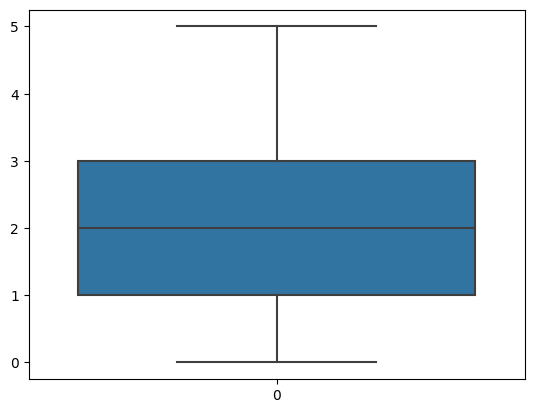

In [ ]:
sns.boxplot(df['goals_for'])

<Axes: >

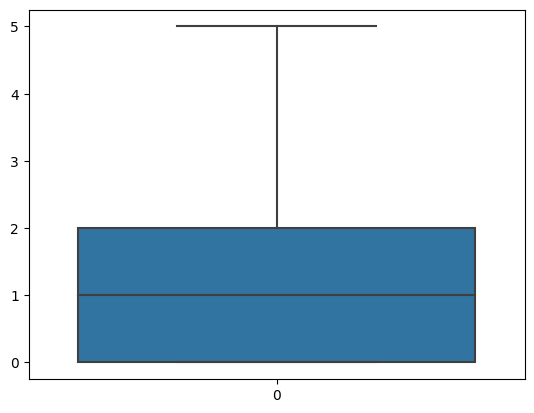

In [ ]:
sns.boxplot(df['goals_against'])

<Axes: >

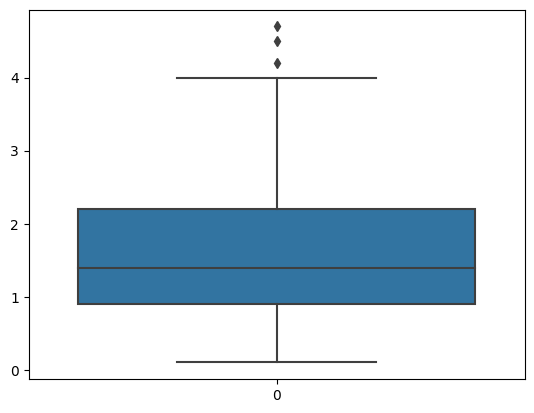

In [ ]:
sns.boxplot(df['expected_goals'])

In [ ]:
print(np.where(df['expected_goals']>3.9))

(array([ 75, 172, 203, 204]),)


In [ ]:
df.drop(df.loc[df['expected_goals']>3.9].index, inplace=True)

<Axes: >

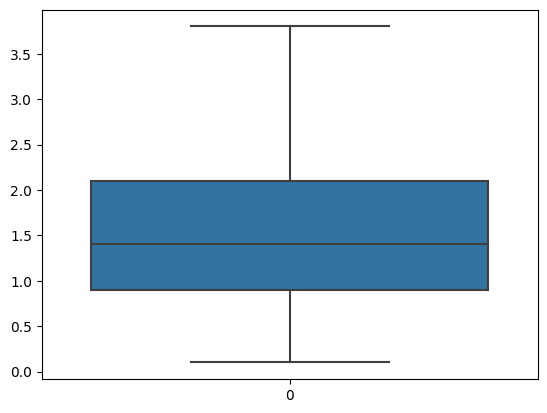

In [ ]:
sns.boxplot(df['expected_goals'])

<Axes: >

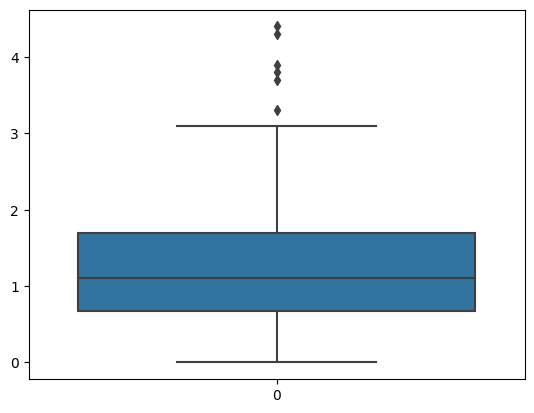

In [ ]:
sns.boxplot(df['expected_goals_allowed'])

In [ ]:
print(np.where(df['expected_goals_allowed']>2.7))

(array([ 29,  39,  40,  49, 136, 150, 157, 170, 185, 190, 207]),)


In [ ]:
df.drop(df.loc[df['expected_goals']>2.7].index, inplace=True)

<Axes: >

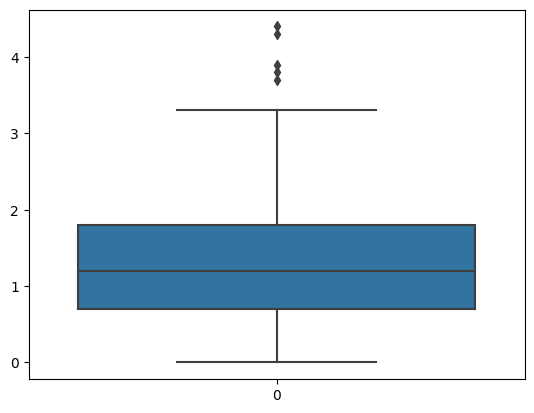

In [ ]:
sns.boxplot(df['expected_goals_allowed'])

<Axes: >

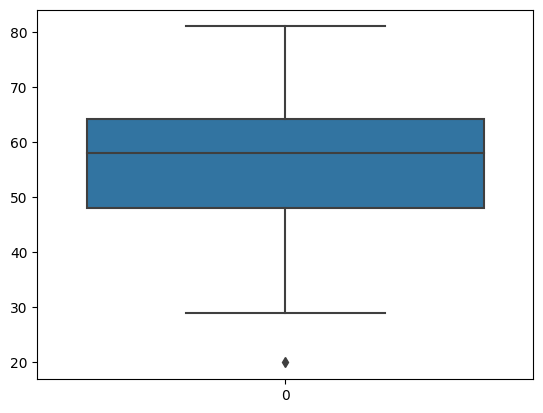

In [ ]:
sns.boxplot(df['possession'])

In [ ]:
print(np.where(df['possession']<30))

(array([35, 50]),)


In [ ]:
df.drop(df.loc[df['possession']<30].index, inplace=True)

<Axes: >

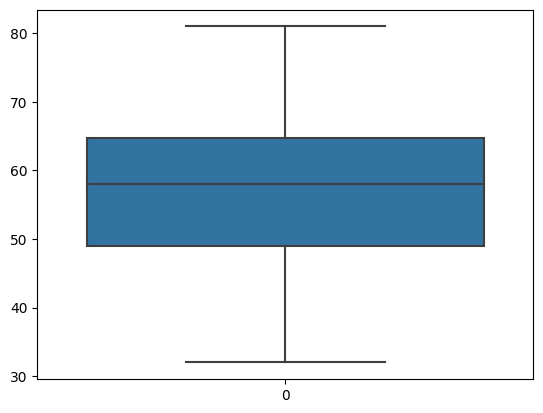

In [ ]:
sns.boxplot(df['possession'])

<Axes: >

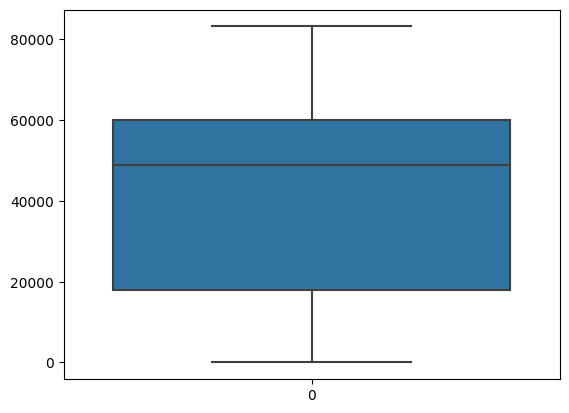

In [ ]:
sns.boxplot(df['attendance'])

<Axes: >

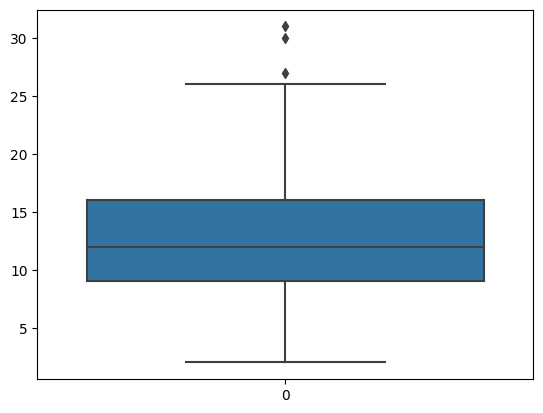

In [ ]:
sns.boxplot(df['total_shots'])

In [ ]:
print(np.where(df['total_shots']>25))

(array([ 22,  35, 105, 177]),)


In [ ]:
df.drop(df.loc[df['total_shots']>25].index, inplace=True)

<Axes: >

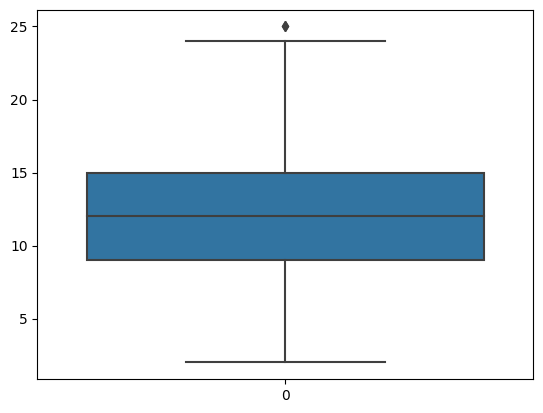

In [ ]:
sns.boxplot(df['total_shots'])

<Axes: >

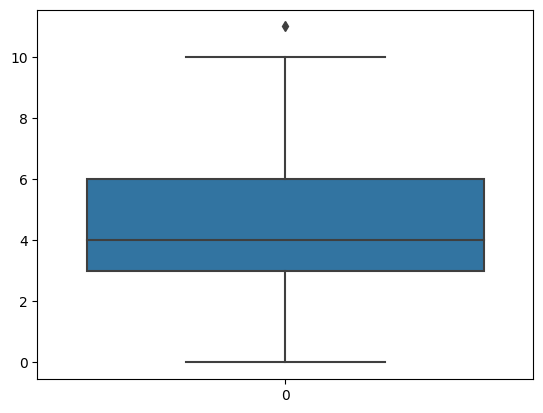

In [ ]:
sns.boxplot(df['shots_on_target'])

In [ ]:
print(np.where(df['shots_on_target']>9))

(array([139, 140]),)


In [ ]:
df.drop(df.loc[df['shots_on_target']>9].index, inplace=True)

<Axes: >

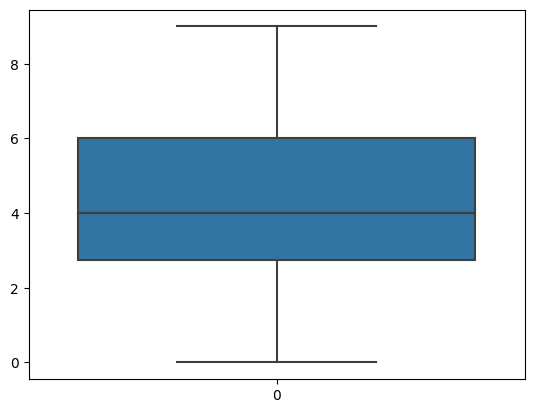

In [ ]:
sns.boxplot(df['shots_on_target'])

<Axes: >

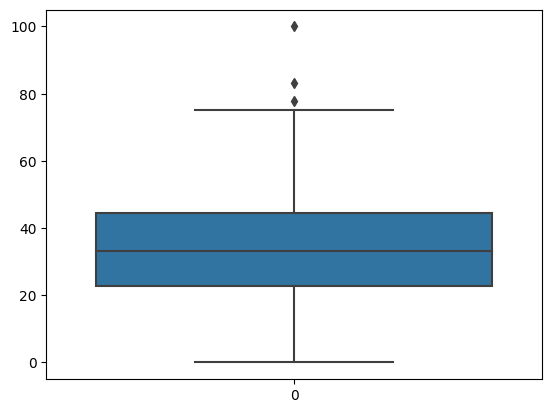

In [ ]:
sns.boxplot(df['shots_on_target%'])

In [ ]:
print(np.where(df['shots_on_target%']>70))

(array([ 65,  66, 122, 142]),)


In [ ]:
df.drop(df.loc[df['shots_on_target%']>70].index, inplace=True)

<Axes: >

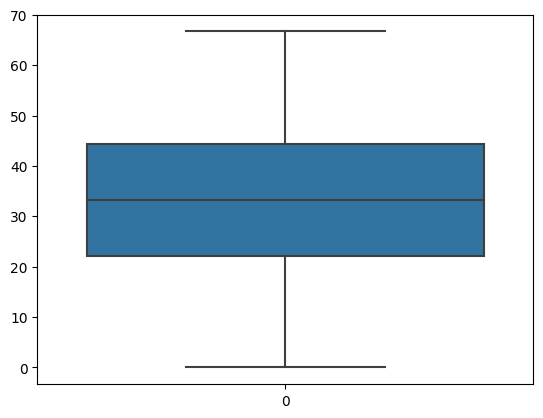

In [ ]:
sns.boxplot(df['shots_on_target%'])

<Axes: >

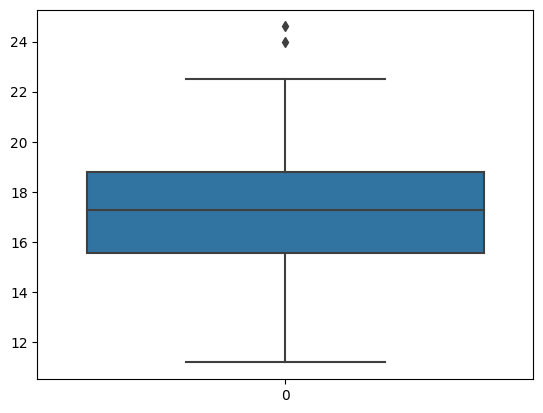

In [ ]:
sns.boxplot(df['average_shot_distance'])

In [ ]:
print(np.where(df['average_shot_distance']>22.5))

(array([61, 67]),)


In [ ]:
print(np.where(df['average_shot_distance']<11.5))

(array([109]),)


In [ ]:
df.drop(df.loc[df['average_shot_distance']>22.5].index, inplace=True)

In [ ]:
df.drop(df.loc[df['average_shot_distance']<11.5].index, inplace=True)

<Axes: >

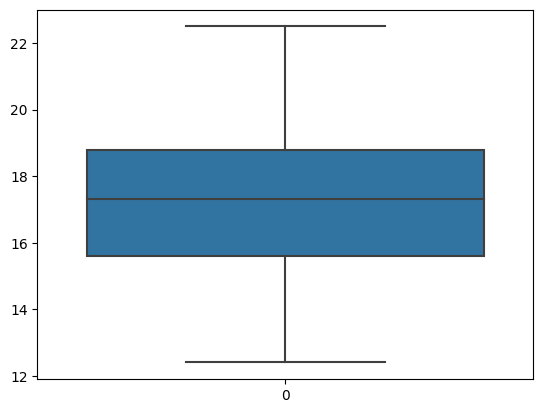

In [ ]:
sns.boxplot(df['average_shot_distance'])

<Axes: >

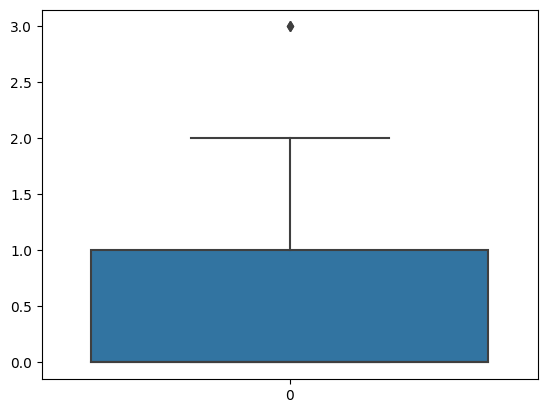

In [ ]:
sns.boxplot(df['freekicks_shots'])

In [ ]:
print(np.where(df['freekicks_shots']>2))

(array([ 78, 169]),)


In [ ]:
df.drop(df.loc[df['freekicks_shots']>2].index, inplace=True)

<Axes: >

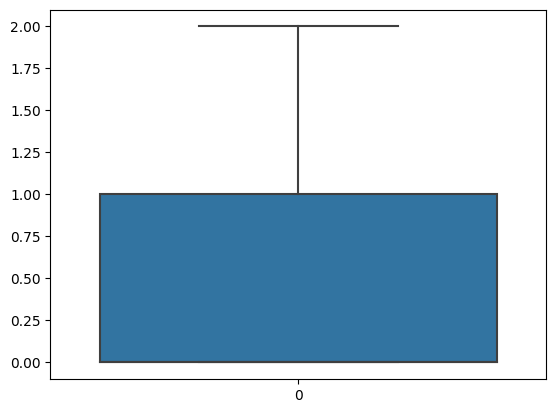

In [ ]:
sns.boxplot(df['freekicks_shots'])

<Axes: >

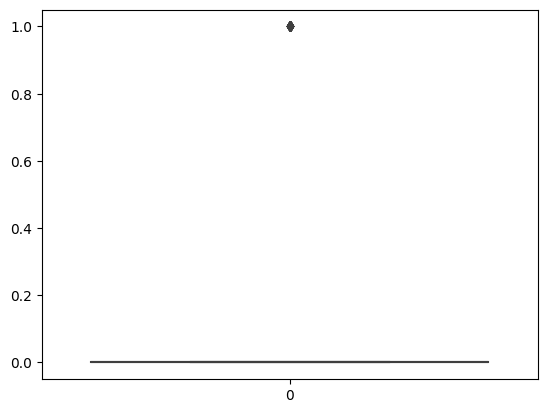

In [ ]:
sns.boxplot(df['penalty_kicks_attempted'])

<Axes: >

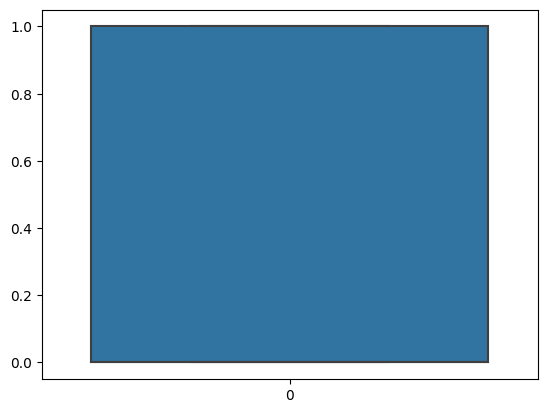

In [ ]:
sns.boxplot(df['clean_sheets'])

<Axes: >

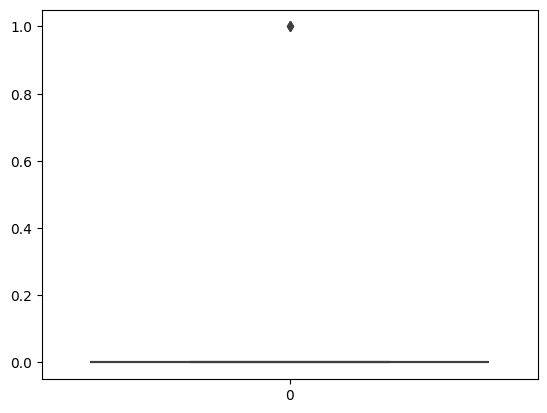

In [ ]:
sns.boxplot(df['penalty_kicks_saved'])

<Axes: >

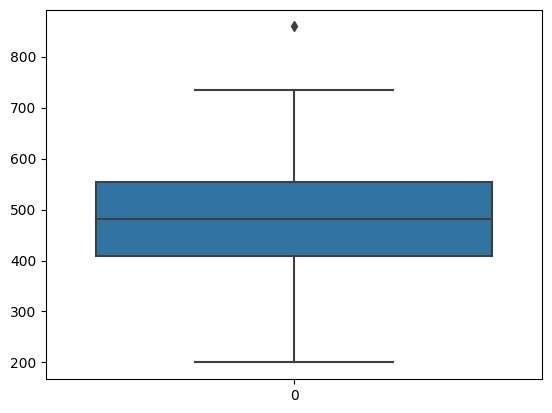

In [ ]:
sns.boxplot(df['completed_passes'])

In [ ]:
print(np.where(df['completed_passes']>750))

(array([182]),)


In [ ]:
print(np.where(df['completed_passes']<210))

(array([127]),)


In [ ]:
df.drop(df.loc[df['completed_passes']>750].index, inplace=True)

In [ ]:
df.drop(df.loc[df['completed_passes']<210].index, inplace=True)

<Axes: >

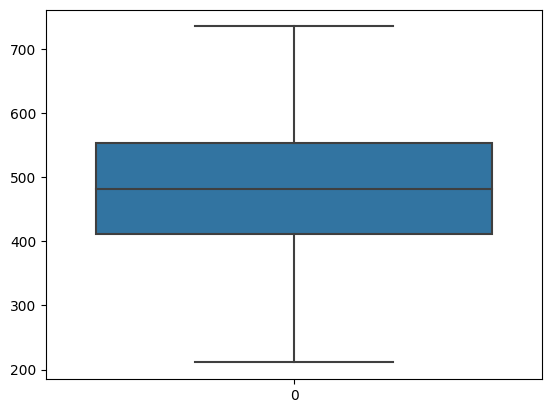

In [ ]:
sns.boxplot(df['completed_passes'])

<Axes: >

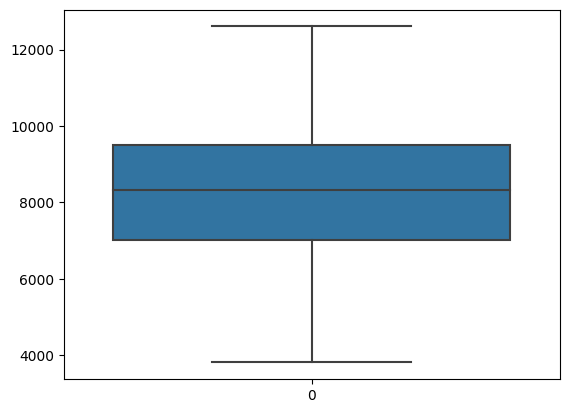

In [ ]:
sns.boxplot(df['total_passing_distance'])

In [ ]:
print(np.where(df['total_passing_distance']>11700))

(array([169, 175]),)


In [ ]:
print(np.where(df['total_passing_distance']<4000))

(array([ 67, 160]),)


In [ ]:
df.drop(df.loc[df['total_passing_distance']>11700].index, inplace=True)

In [ ]:
df.drop(df.loc[df['total_passing_distance']<4000].index, inplace=True)

<Axes: >

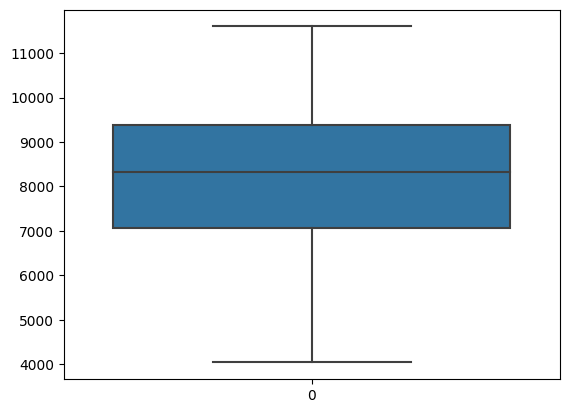

In [ ]:
sns.boxplot(df['total_passing_distance'])

<Axes: >

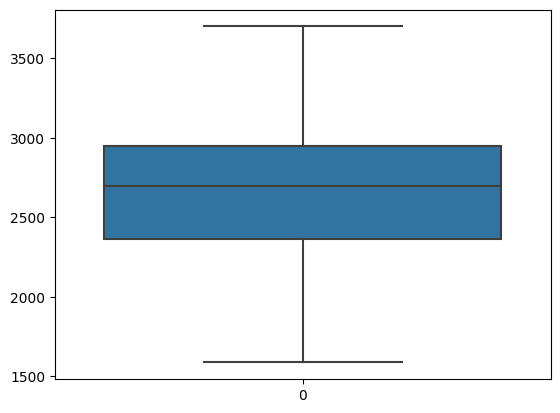

In [ ]:
sns.boxplot(df['progressive_passing_distance'])

In [ ]:
print(np.where(df['progressive_passing_distance']>3500))

(array([161, 170, 171, 175]),)


In [ ]:
print(np.where(df['progressive_passing_distance']<1600))

(array([119]),)


In [ ]:
df.drop(df.loc[df['progressive_passing_distance']>3500].index, inplace=True)

In [ ]:
df.drop(df.loc[df['progressive_passing_distance']<1600].index, inplace=True)

<Axes: >

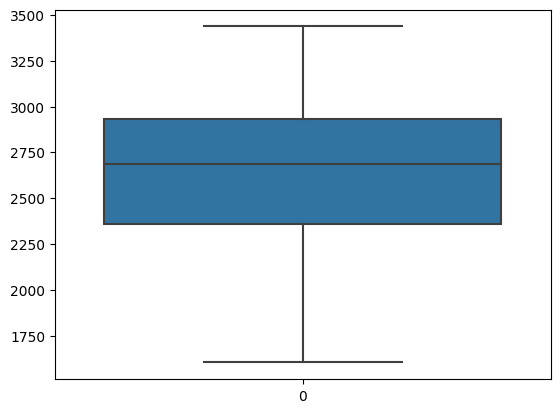

In [ ]:
sns.boxplot(df['progressive_passing_distance'])

<Axes: >

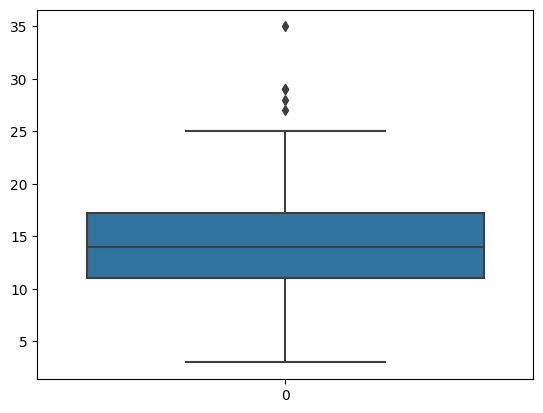

In [ ]:
sns.boxplot(df['tackles'])

In [ ]:
print(np.where(df['tackles']>28))

(array([  0, 122, 145]),)


In [ ]:
#df.drop(df.loc[df['tackles']>28].index, inplace=True)

<Axes: >

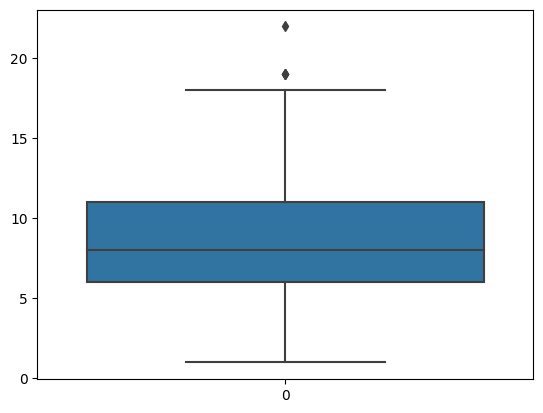

In [ ]:
sns.boxplot(df['tackles_won'])

In [ ]:
print(np.where(df['tackles_won']>18))

(array([122, 145, 172, 180]),)


In [ ]:
df.drop(df.loc[df['tackles_won']>18].index, inplace=True)

<Axes: >

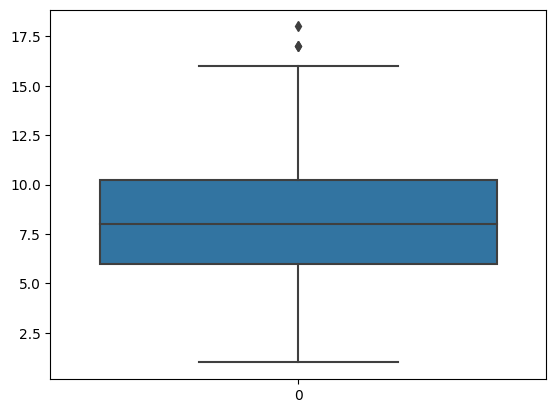

In [ ]:
sns.boxplot(df['tackles_won'])

<Axes: >

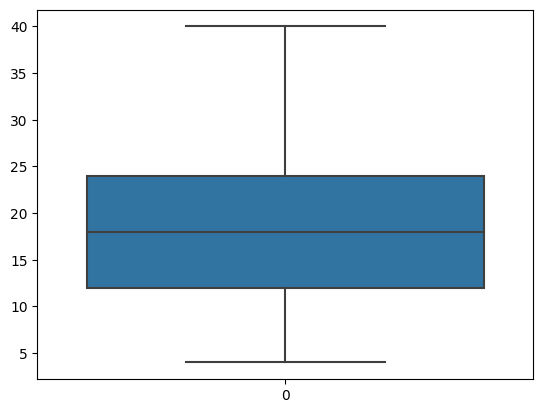

In [ ]:
sns.boxplot(df['clearances'])

<Axes: >

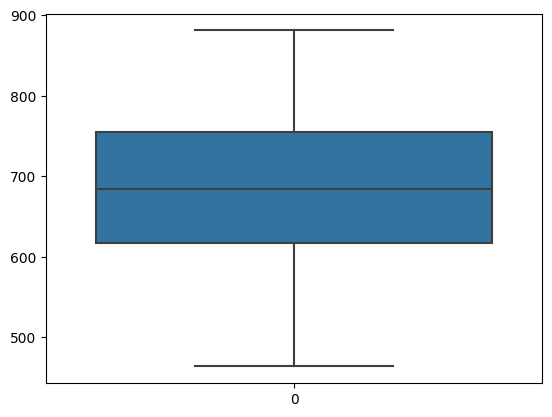

In [ ]:
sns.boxplot(df['touches'])

In [ ]:
print(np.where(df['touches']>880))

(array([134]),)


In [ ]:
print(np.where(df['touches']<470))

(array([61]),)


In [ ]:

df.drop(df.loc[df['touches']>880].index, inplace=True)

In [ ]:
df.drop(df.loc[df['touches']<470].index, inplace=True)

<Axes: >

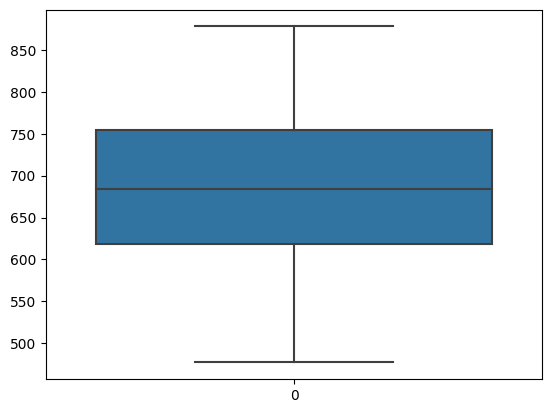

In [ ]:
sns.boxplot(df['touches'])

<Axes: >

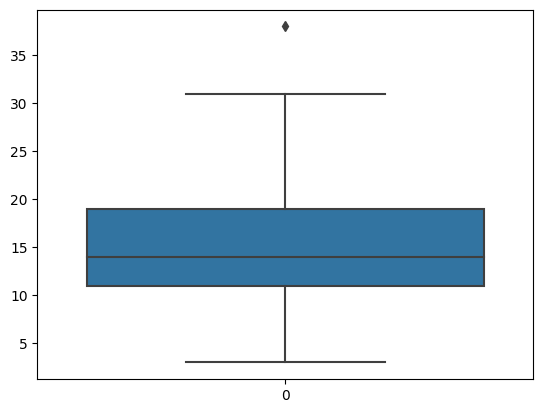

In [ ]:
sns.boxplot(df['final_third_carries'])

In [ ]:
print(np.where(df['final_third_carries']>28))

(array([ 67, 159, 163]),)


In [ ]:
df.drop(df.loc[df['final_third_carries']>28].index, inplace=True)

<Axes: >

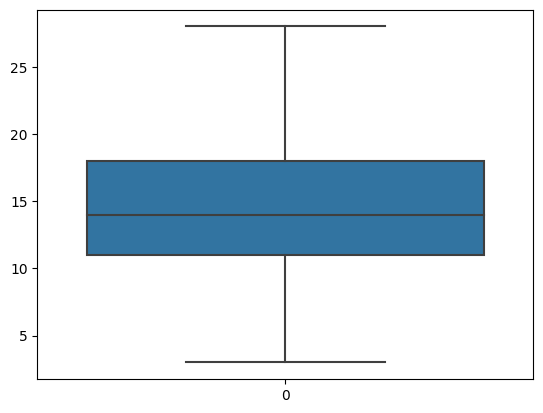

In [ ]:
sns.boxplot(df['final_third_carries'])

<Axes: >

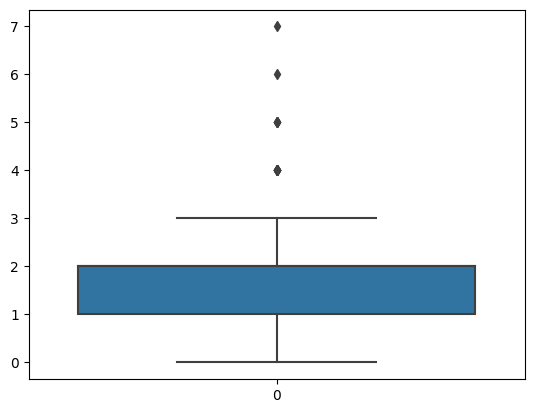

In [ ]:
sns.boxplot(df['crdy'])

In [ ]:
print(np.where(df['crdy']>4))

(array([ 48,  96, 109, 135, 153, 159]),)


In [ ]:
df.drop(df.loc[df['crdy']>4].index, inplace=True)

<Axes: >

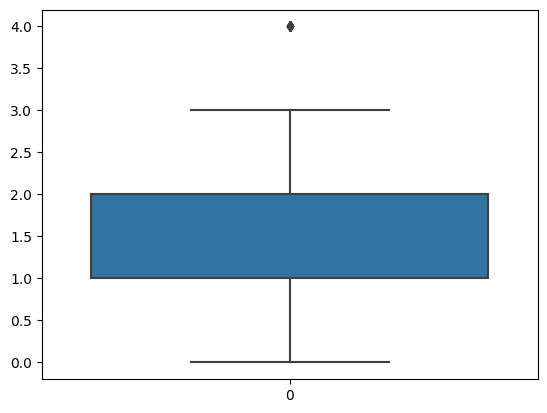

In [ ]:
sns.boxplot(df['crdy'])

<Axes: >

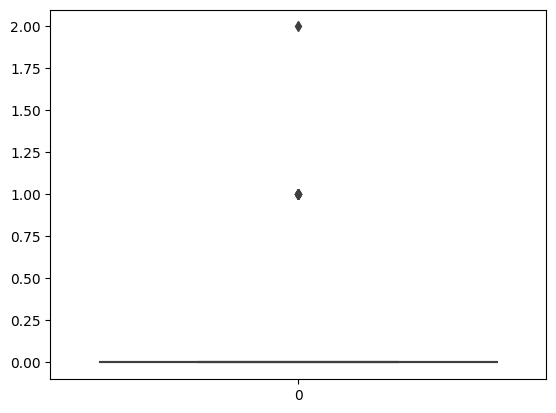

In [ ]:
sns.boxplot(df['crdr'])

<Axes: >

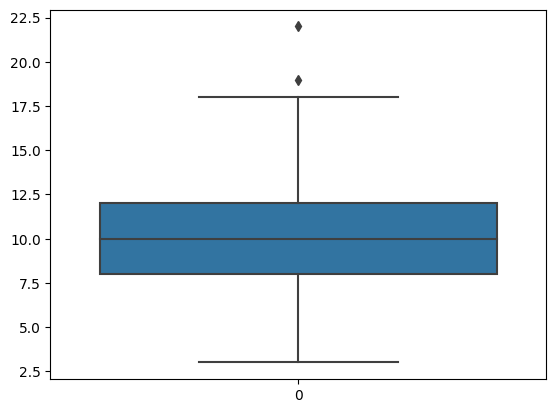

In [ ]:
sns.boxplot(df['fls'])

In [ ]:
print(np.where(df['fls']>17.5))

(array([ 98, 108, 119]),)


In [ ]:
df.drop(df.loc[df['fls']>17.5].index, inplace=True)

<Axes: >

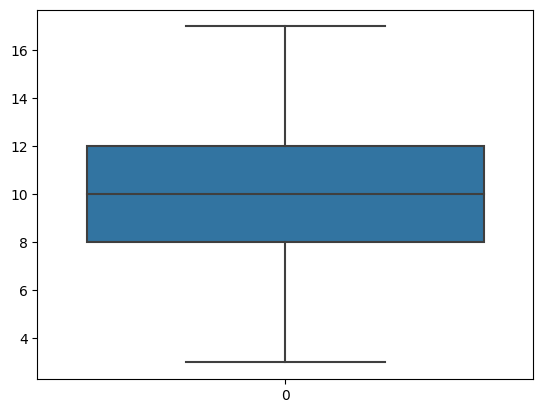

In [ ]:
sns.boxplot(df['fls'])

<Axes: >

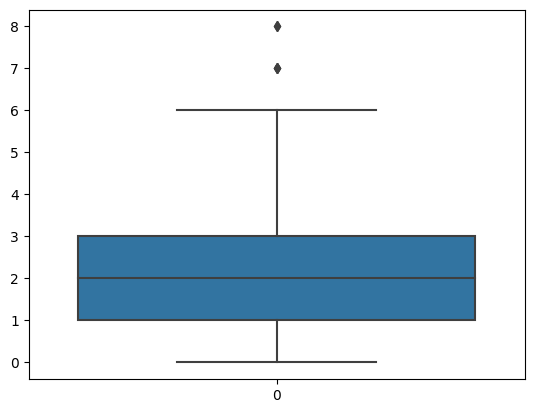

In [ ]:
sns.boxplot(df['offsides'])

In [ ]:
print(np.where(df['offsides']>6))

(array([ 41, 101, 118, 125, 151]),)


In [ ]:
df.drop(df.loc[df['offsides']>6].index, inplace=True)

<Axes: >

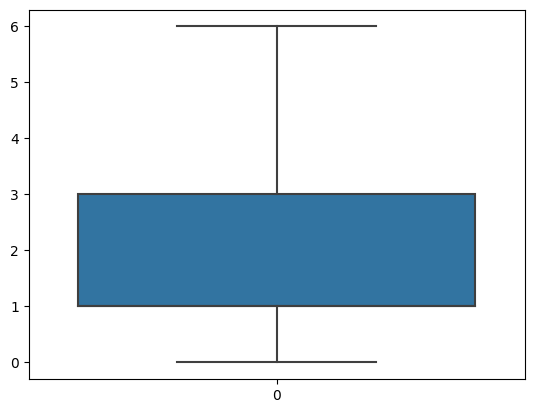

In [ ]:
sns.boxplot(df['offsides'])

<Axes: >

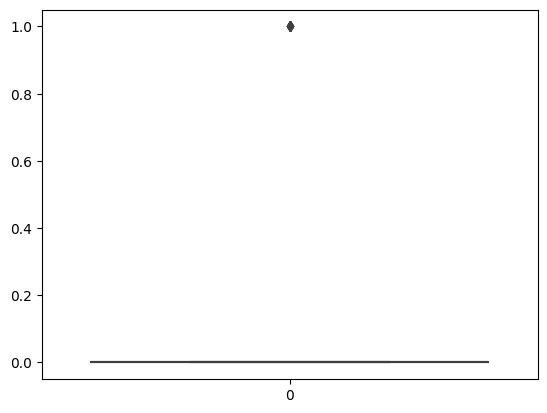

In [ ]:
sns.boxplot(df['own_goals'])

# ***Exploratory Data Analysis (EDA) / Data Understanding***




In [ ]:
df.describe().T

count          mean           std     min  \
goals_for                     161.0      1.726708      1.279588     0.0   
goals_against                 161.0      1.180124      1.083329     0.0   
expected_goals                161.0      1.476398      0.677912     0.1   
expected_goals_allowed        161.0      1.222360      0.770144     0.0   
possession                    161.0     56.950311      9.889895    33.0   
attendance                    161.0  37052.130435  25103.626873     0.0   
total_shots                   161.0     13.000000      4.556589     3.0   
shots_on_target               161.0      4.335404      2.132909     0.0   
shots_on_target%              161.0     34.070186     14.295667     0.0   
average_shot_distance         161.0     17.229814      2.180448    12.6   
freekicks_shots               161.0      0.484472      0.633498     0.0   
penalty_kicks                 161.0      0.099379      0.300104     0.0   
penalty_kicks_attempted       161.0      0.130435      0.337832     0.0   
saves                         161.0      2.937888      1.899636     0.0   
clean_sheets                  161.0      0.316770      0.466669     0.0   
penalty_kicks_saved           161.0      0.012422      0.111107     0.0   
completed_passes              161.0    479.708075     99.334450   223.0   
total_passing_distance        161.0   8226.322981   1649.966206  4042.0   
progressive_passing_distance  161.0   2655.559006    414.074297  1603.0   
tackles                       161.0     14.111801      4.727570     4.0   
tackles_won                   161.0      8.428571      3.450932     1.0   
challenges_lost               161.0      8.062112      4.033747     0.0   
clearances                    161.0     18.503106      8.030508     4.0   
touches                       161.0    684.385093     95.830258   477.0   
successful_takeon%            161.0     54.733540     15.074962    12.5   
final_third_carries           161.0     14.720497      5.215615     3.0   
crdy                          161.0      1.559006      1.100254     0.0   
crdr                          161.0      0.049689      0.244981     0.0   
fls                           161.0      9.968944      2.829360     3.0   
offsides                      161.0      1.763975      1.464221     0.0   
own_goals                     161.0      0.037267      0.190007     0.0   
output                        161.0      0.521739      0.501086     0.0   

                                  25%      50%      75%      max  
goals_for                         1.0      2.0      3.0      5.0  
goals_against                     0.0      1.0      2.0      5.0  
expected_goals                    0.9      1.4      2.0      2.7  
expected_goals_allowed            0.7      1.0      1.7      3.9  
possession                       50.0     59.0     64.0     81.0  
attendance                    10836.0  40142.0  59964.0  83222.0  
total_shots                       9.0     13.0     15.0     25.0  
shots_on_target                   3.0      4.0      6.0      9.0  
shots_on_target%                 23.5     33.3     44.4     66.7  
average_shot_distance            15.6     17.3     18.7     22.5  
freekicks_shots                   0.0      0.0      1.0      2.0  
penalty_kicks                     0.0      0.0      0.0      1.0  
penalty_kicks_attempted           0.0      0.0      0.0      1.0  
saves                             2.0      3.0      4.0      9.0  
clean_sheets                      0.0      0.0      1.0      1.0  
penalty_kicks_saved               0.0      0.0      0.0      1.0  
completed_passes                426.0    484.0    550.0    681.0  
total_passing_distance         7362.0   8353.0   9379.0  11598.0  
progressive_passing_distance   2407.0   2713.0   2949.0   3437.0  
tackles                          11.0     14.0     17.0     29.0  
tackles_won                       6.0      8.0     10.0     18.0  
challenges_lost                   5.0      7.0     10.0     21.0  
clearances   

array([[<Axes: title={'center': 'output'}>]], dtype=object)

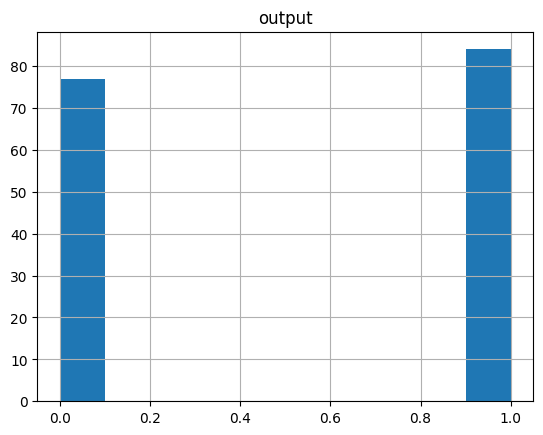

In [ ]:
df.hist(column="output")

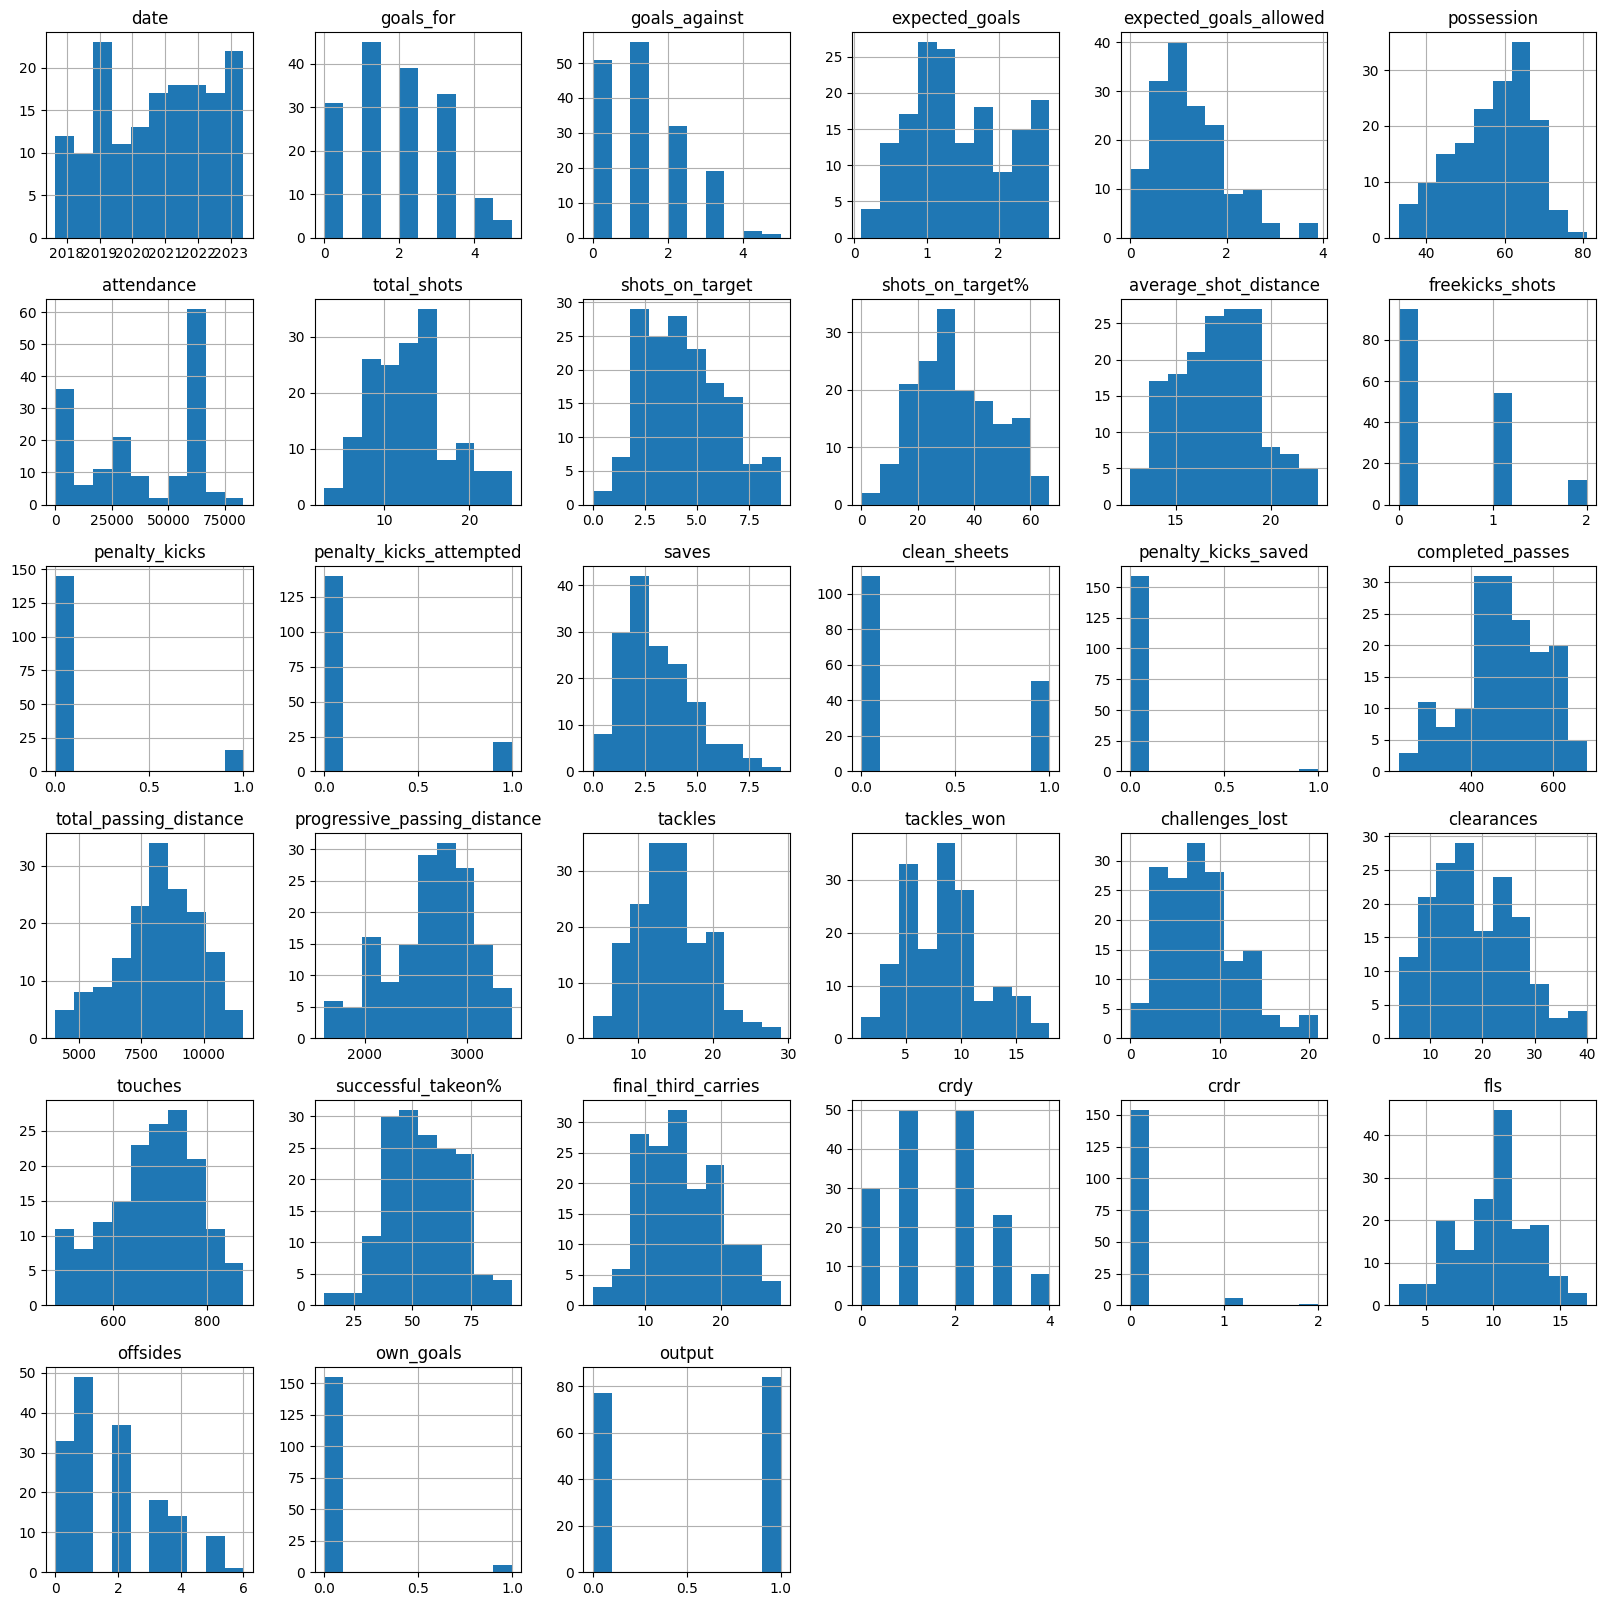

In [ ]:
p = df.hist(figsize = (20,20))

In [ ]:
df.corr()['output'].sort_values()

<ipython-input-133-ba0695fd8a8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['output'].sort_values()


goals_against                  -0.565663
expected_goals_allowed         -0.346233
average_shot_distance          -0.268309
challenges_lost                -0.217122
crdy                           -0.192226
crdr                           -0.161596
saves                          -0.116760
own_goals                      -0.074207
final_third_carries            -0.065817
successful_takeon%             -0.057435
fls                            -0.041401
tackles                        -0.014224
total_passing_distance          0.006682
possession                      0.012831
completed_passes                0.017268
touches                         0.021821
freekicks_shots                 0.025681
offsides                        0.032592
tackles_won                     0.039758
attendance                      0.077143
progressive_passing_distance    0.088862
penalty_kicks_saved             0.107380
clearances                      0.140935
penalty_kicks_attempted         0.149287
penalty_kicks   

<ipython-input-134-aed03781eda6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')


<Axes: >

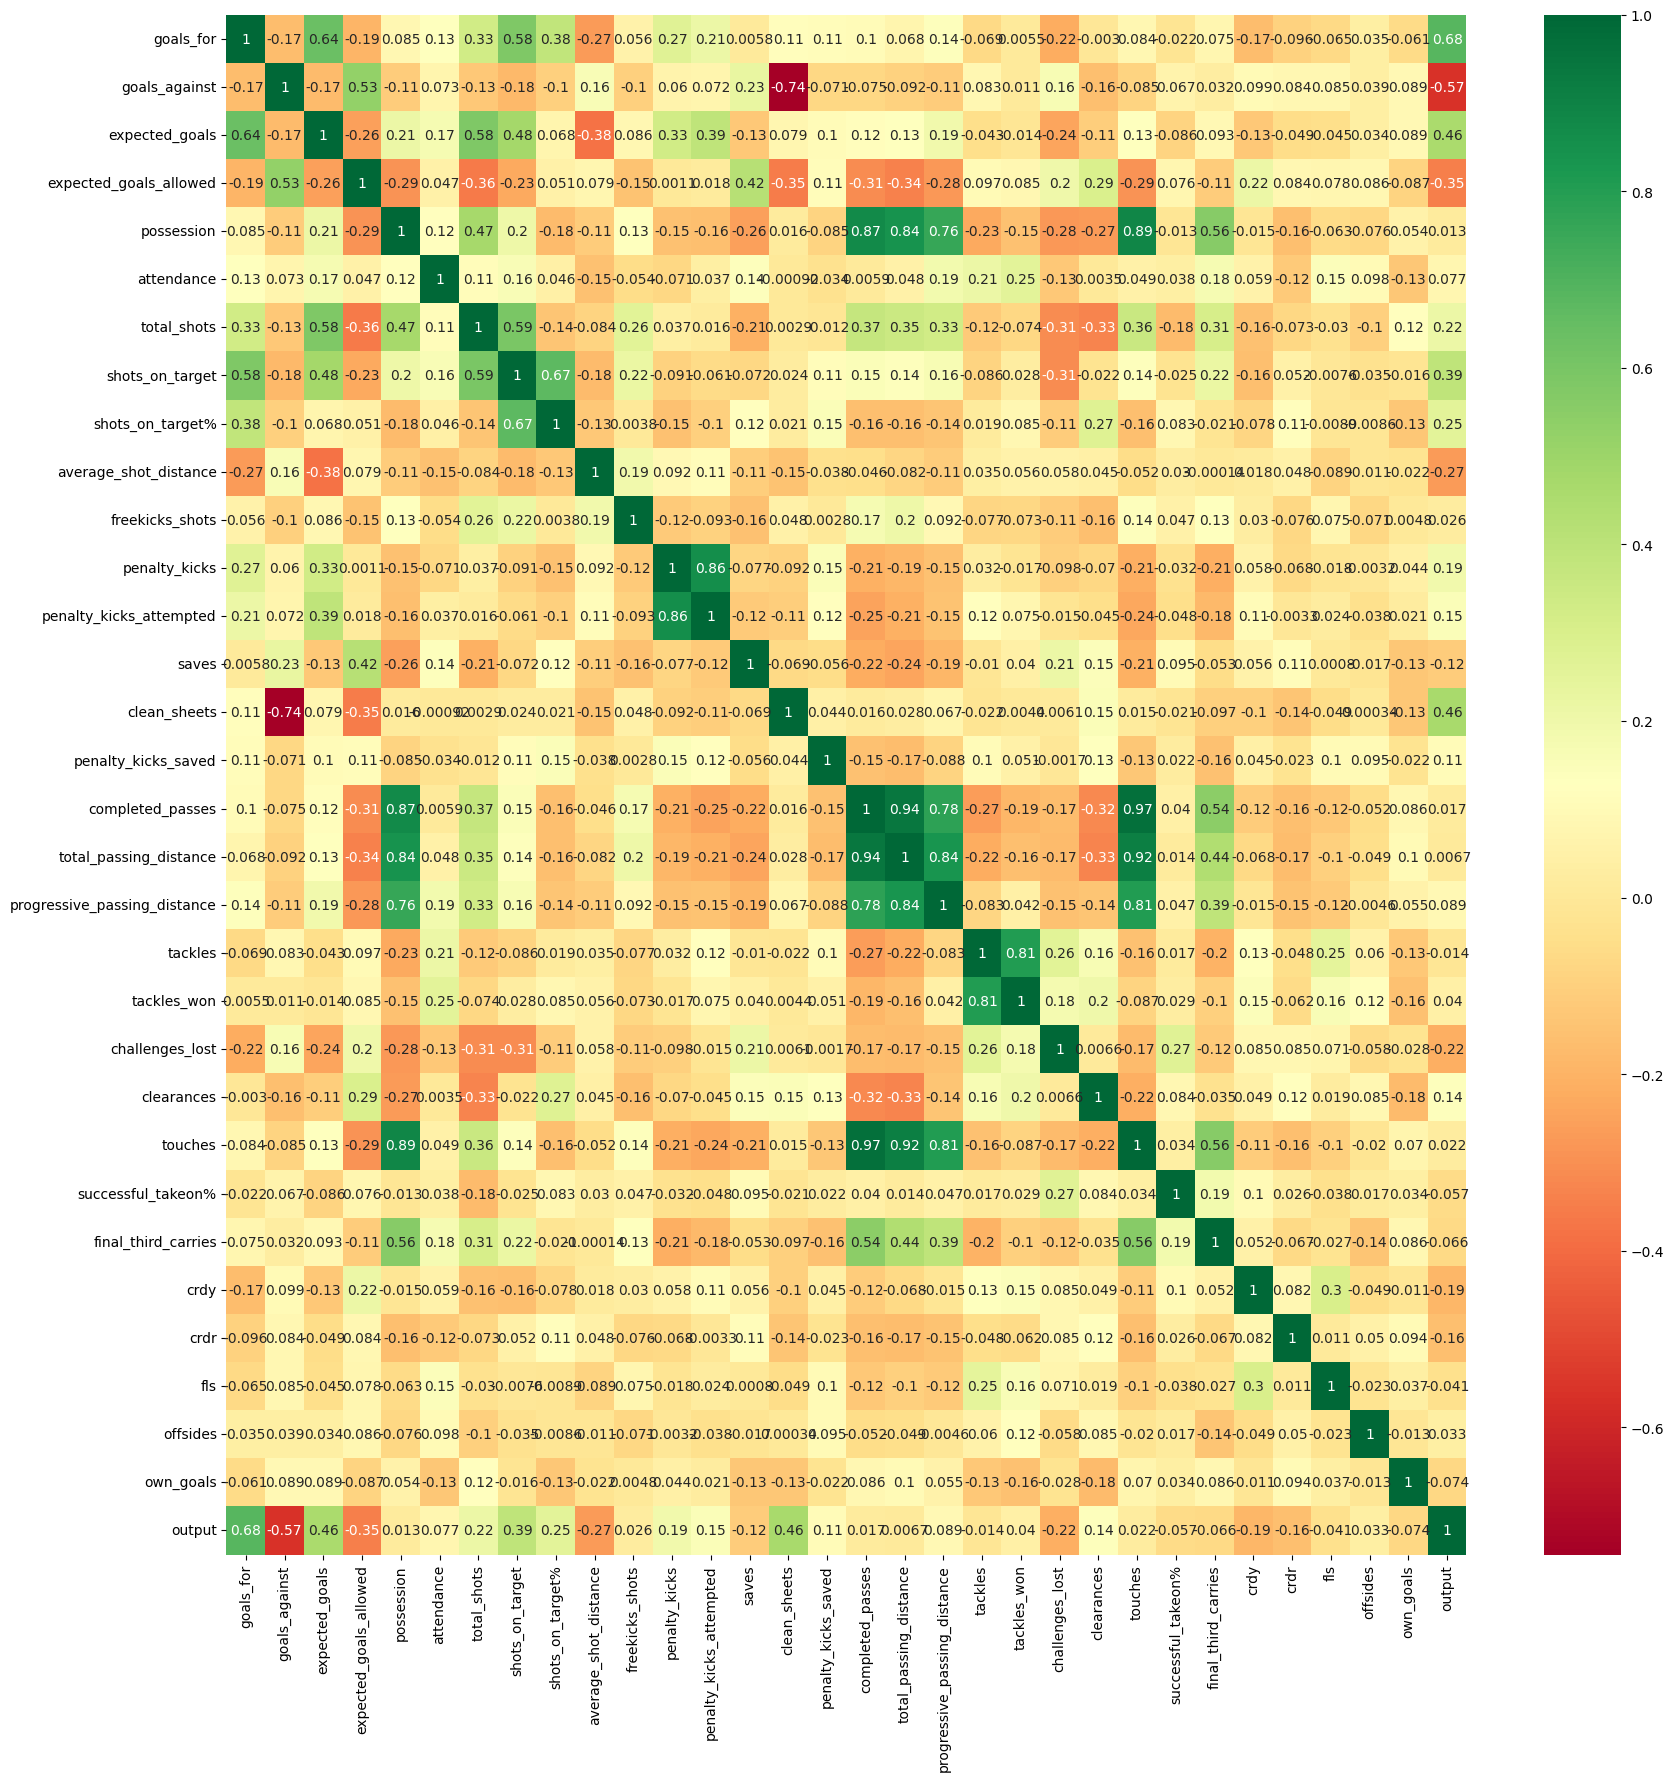

In [ ]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
# Overall performance using python

In [ ]:
df.dtypes

date                            datetime64[ns]
time                                    object
round                                   object
day                                     object
venue                                   object
goals_for                                int64
goals_against                            int64
opponent                                object
expected_goals                         float64
expected_goals_allowed                 float64
possession                             float64
attendance                             float64
captain                                 object
formation                               object
referee                                 object
match report                            object
total_shots                              int64
shots_on_target                          int64
shots_on_target%                       float64
average_shot_distance                  float64
freekicks_shots                          int64
penalty_kicks

Goals Scored : 278
Goals Against : 190
Goals Scored Per Game : 1.219298245614035
Goals Against Per Game : 0.8333333333333334


<Axes: title={'center': 'Goals Conceded'}, ylabel='Frequency'>

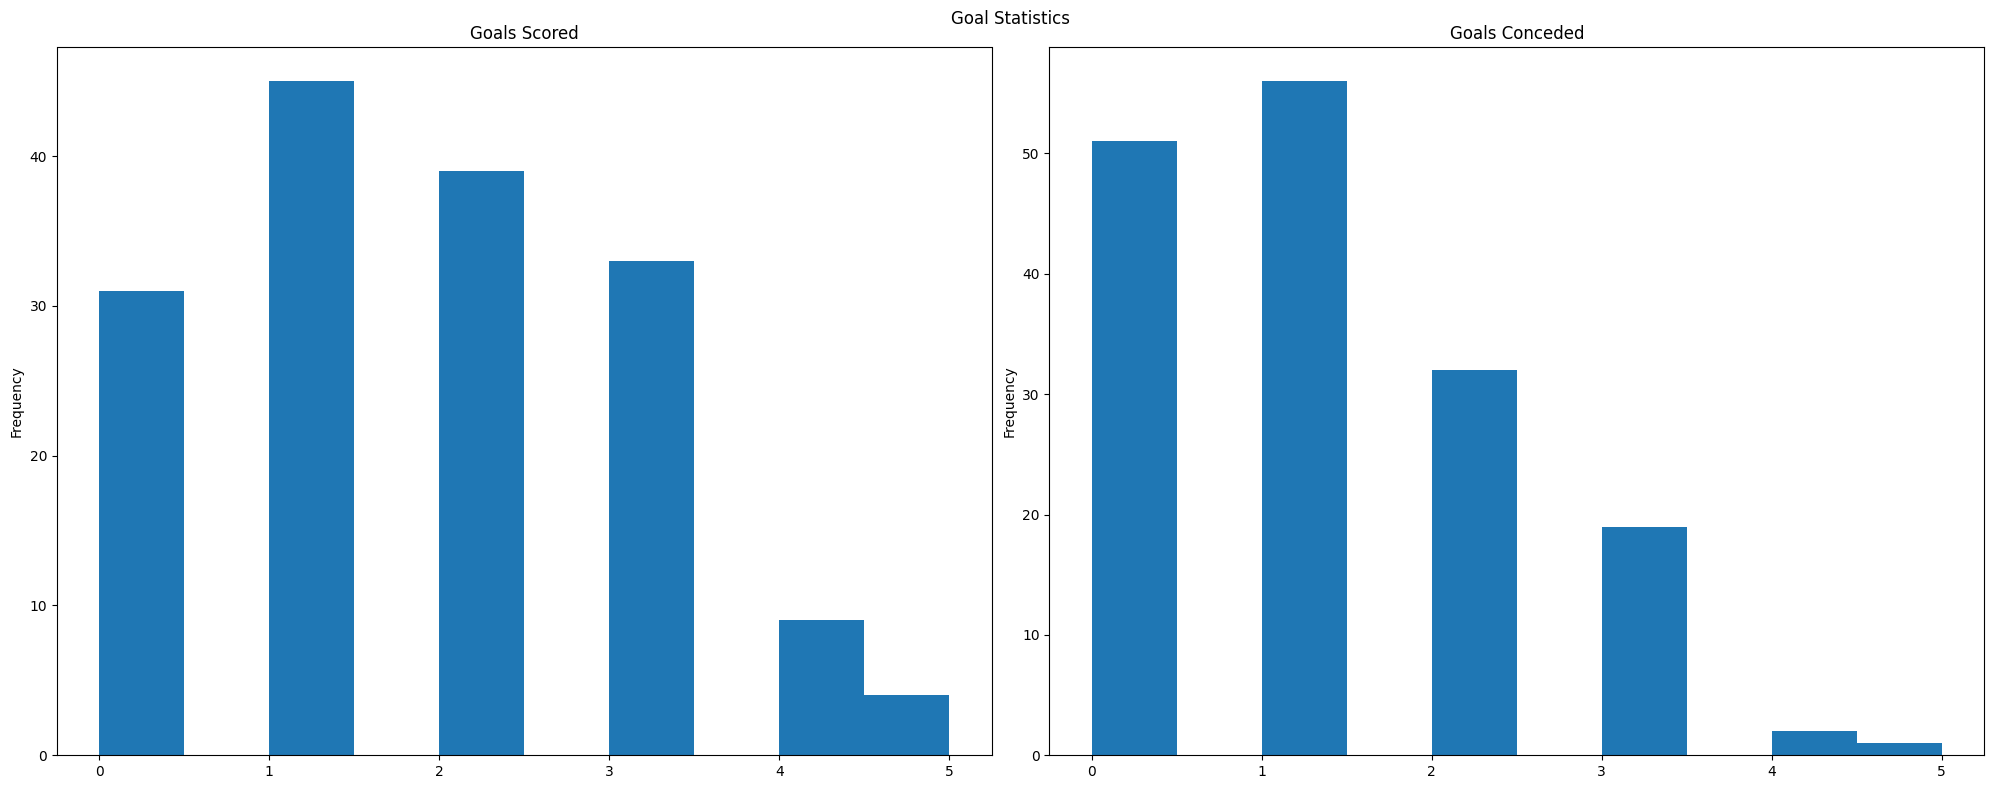

In [ ]:
TOTAL_MATCHDAYS = 228
Goals_accum = sum(map(int,df['goals_for']))
Goals_agnst = sum(map(int,df['goals_against']))

Goals_scored_per_game = Goals_accum/TOTAL_MATCHDAYS
Goals_against_per_game = Goals_agnst/TOTAL_MATCHDAYS

print(f'Goals Scored : {Goals_accum}')
print(f'Goals Against : {Goals_agnst}')

print(f'Goals Scored Per Game : {Goals_scored_per_game}')
print(f'Goals Against Per Game : {Goals_against_per_game}')

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Goal Statistics')
fig.tight_layout()
df['goals_for'].astype('int').plot.hist(ax=axes[0], title='Goals Scored')
df['goals_against'].astype('int').plot.hist(ax=axes[1], title='Goals Conceded')

Total Shots Taken : 2093
Total Shots on Target : 698
Average Shots on Target % : 24.058333333333334
Average Goals per Shot Taken: 0.09601022677624152
Average Distance from Goal(in yards) : 12.166666666666668
Total Freekick Goals Scored : 78
Total Penalty Goals Scored: 16
Total Penalty Goals Attempted : 21
Penalty Conversion Rate : 76.19047619047619
Percentage Freekick Goals : 28.057553956834532





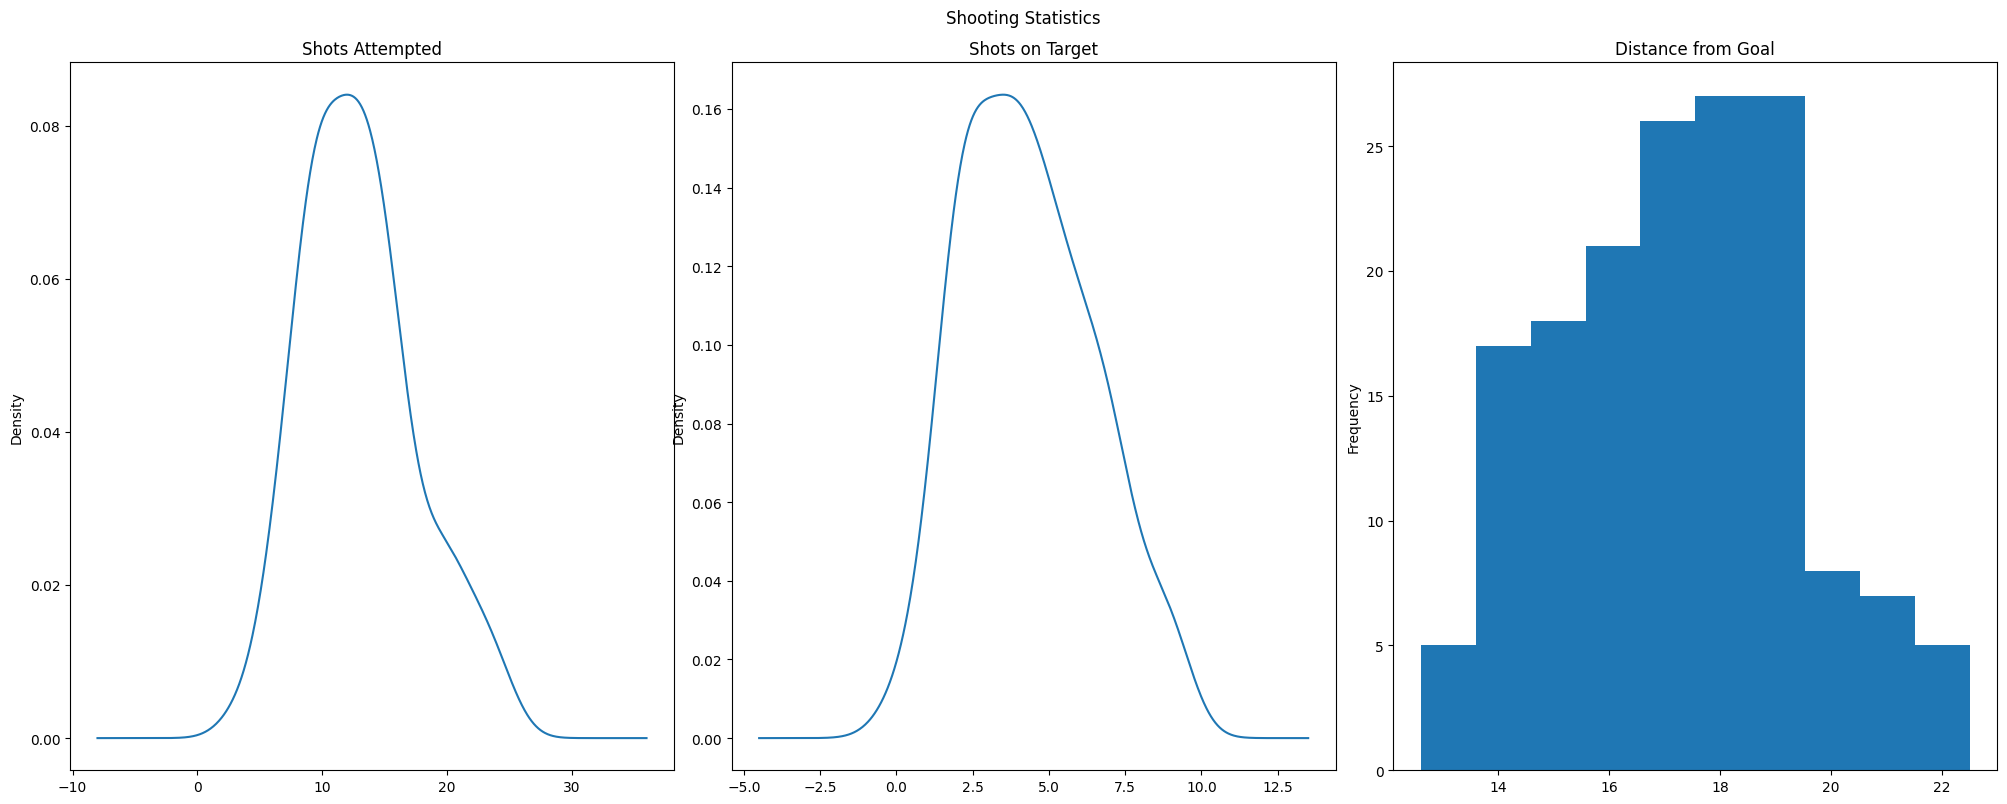

Average expected goals accumulated : 1.042543859649123
Average expected goals allowed accumulated  : 0.8631578947368422


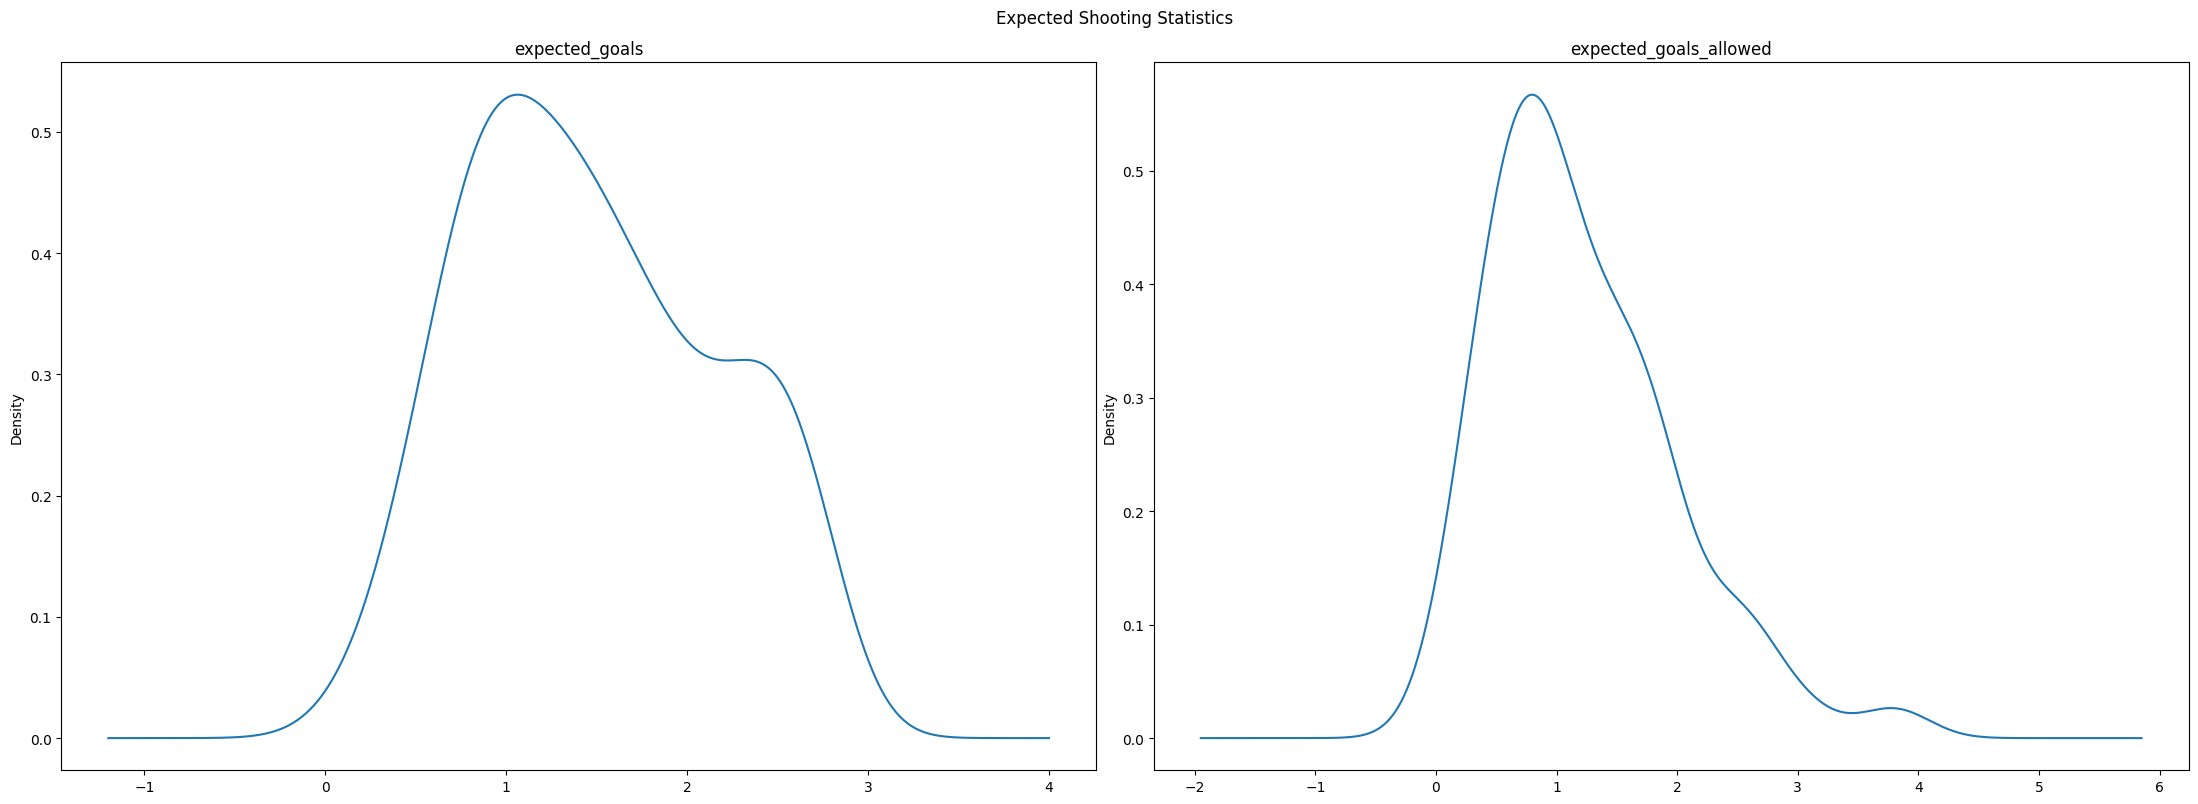

In [ ]:
Total_shots_taken = sum(map(int,df['total_shots']))
Total_shots_on_target = sum(map(int,df['shots_on_target']))
Total_Goals_by_shots = sum(map(float,(df['goals_for'])/df['total_shots']))
Average_shots_on_target_percentage =  sum(map(float,df['shots_on_target%']))/TOTAL_MATCHDAYS
Average_goals_per_shot = Total_Goals_by_shots/TOTAL_MATCHDAYS

Average_distance_from_goal = sum(map(float,df['average_shot_distance']))/TOTAL_MATCHDAYS
Total_freekick_goals_scored = sum(map(int,df['freekicks_shots']))
Total_penalty_goals_scored = sum(map(int,df['penalty_kicks']))
Total_penalty_goals_attempted = sum(map(int,df['penalty_kicks_attempted']))

Penalty_conversion_rate = Total_penalty_goals_scored*100/Total_penalty_goals_attempted
Percentage_freekick_goals = Total_freekick_goals_scored*100/Goals_accum

print(f'Total Shots Taken : {Total_shots_taken}')
print(f'Total Shots on Target : {Total_shots_on_target}')
print(f'Average Shots on Target % : {Average_shots_on_target_percentage}')
print(f'Average Goals per Shot Taken: {Average_goals_per_shot}')
print(f'Average Distance from Goal(in yards) : {Average_distance_from_goal}')        # yards - the penalty box is (18 yards)
print(f'Total Freekick Goals Scored : {Total_freekick_goals_scored}')
print(f'Total Penalty Goals Scored: {Total_penalty_goals_scored}')
print(f'Total Penalty Goals Attempted : {Total_penalty_goals_attempted}')
print(f'Penalty Conversion Rate : {Penalty_conversion_rate}')
print(f'Percentage Freekick Goals : {Percentage_freekick_goals}\n\n\n')

fig, axes = plt.subplots(1, 3, figsize=(20, 8))
fig.suptitle('Shooting Statistics', y= 1)
fig.tight_layout()

df['total_shots'].astype('float').plot.kde(ax=axes[0],title='Shots Attempted')

df['shots_on_target'].astype('float').plot.kde(ax=axes[1],title='Shots on Target')
df['average_shot_distance'].astype('float').plot.hist(ax=axes[2], title='Distance from Goal')

plt.show()


Average_expected_goals = sum(map(float, df['expected_goals']))/TOTAL_MATCHDAYS
Average_expected_goals_allowed = sum(map(float, df['expected_goals_allowed']))/TOTAL_MATCHDAYS
print(f'Average expected goals accumulated : {Average_expected_goals}')
print(f'Average expected goals allowed accumulated  : {Average_expected_goals_allowed}')

fig, axes = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Expected Shooting Statistics', y=1)
fig.tight_layout()

df['expected_goals'].astype('float').plot.kde(ax=axes[0],title='expected_goals')
df['expected_goals_allowed'].astype('float').plot.kde(ax=axes[1],title='expected_goals_allowed')
plt.show()

Average Passes Completed : 338.74122807017545
Average Completed Pass Distance : 5808.938596491228
Average Progressive Pass Distance : 1875.1973684210527


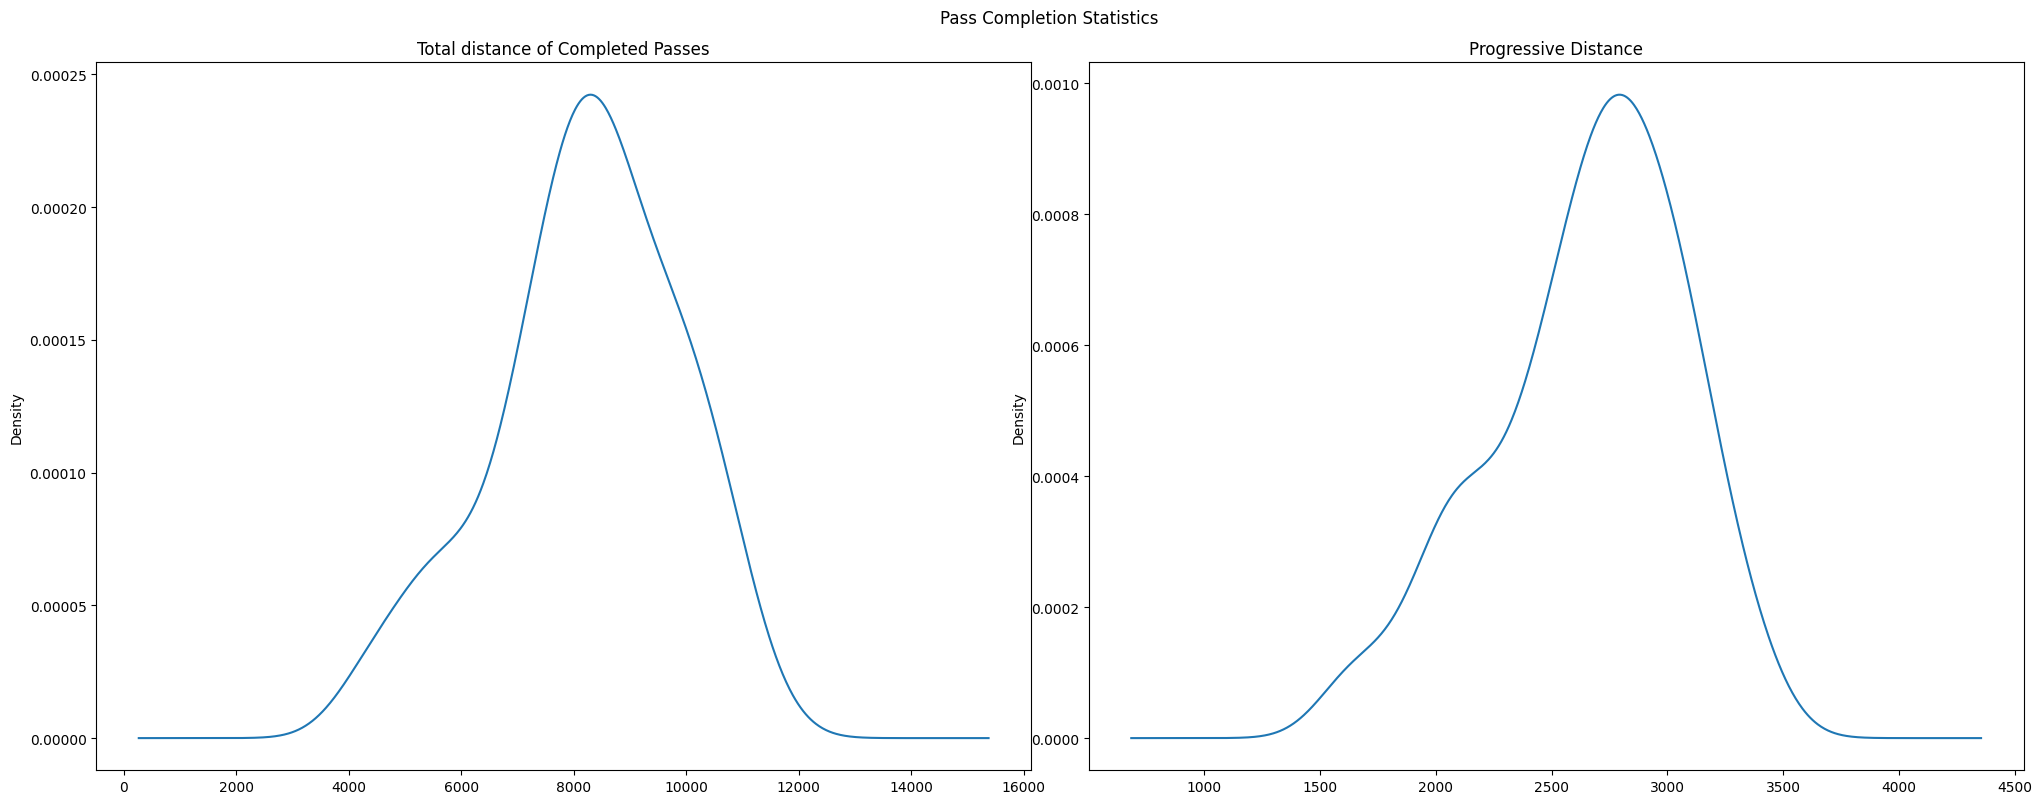

In [ ]:
Average_passes_completed = sum(map(float, df['completed_passes']))/TOTAL_MATCHDAYS
Average_completed_pass_distance = sum(map(float, df['total_passing_distance']))/TOTAL_MATCHDAYS
Average_progressive_pass_distance = sum(map(float, df['progressive_passing_distance']))/TOTAL_MATCHDAYS
print(f'Average Passes Completed : {Average_passes_completed}')
print(f'Average Completed Pass Distance : {Average_completed_pass_distance}')
print(f'Average Progressive Pass Distance : {Average_progressive_pass_distance}')

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Pass Completion Statistics', y=1)
fig.tight_layout()
df['total_passing_distance'].astype('float').plot.kde(ax=axes[0], title='Total distance of Completed Passes')
df['progressive_passing_distance'].astype('float').plot.kde(ax=axes[1], title='Progressive Distance')

plt.show()

Average Possession accumulated throughout: 40.21491228070175
Average Touches accumulated throughout : 483.2719298245614


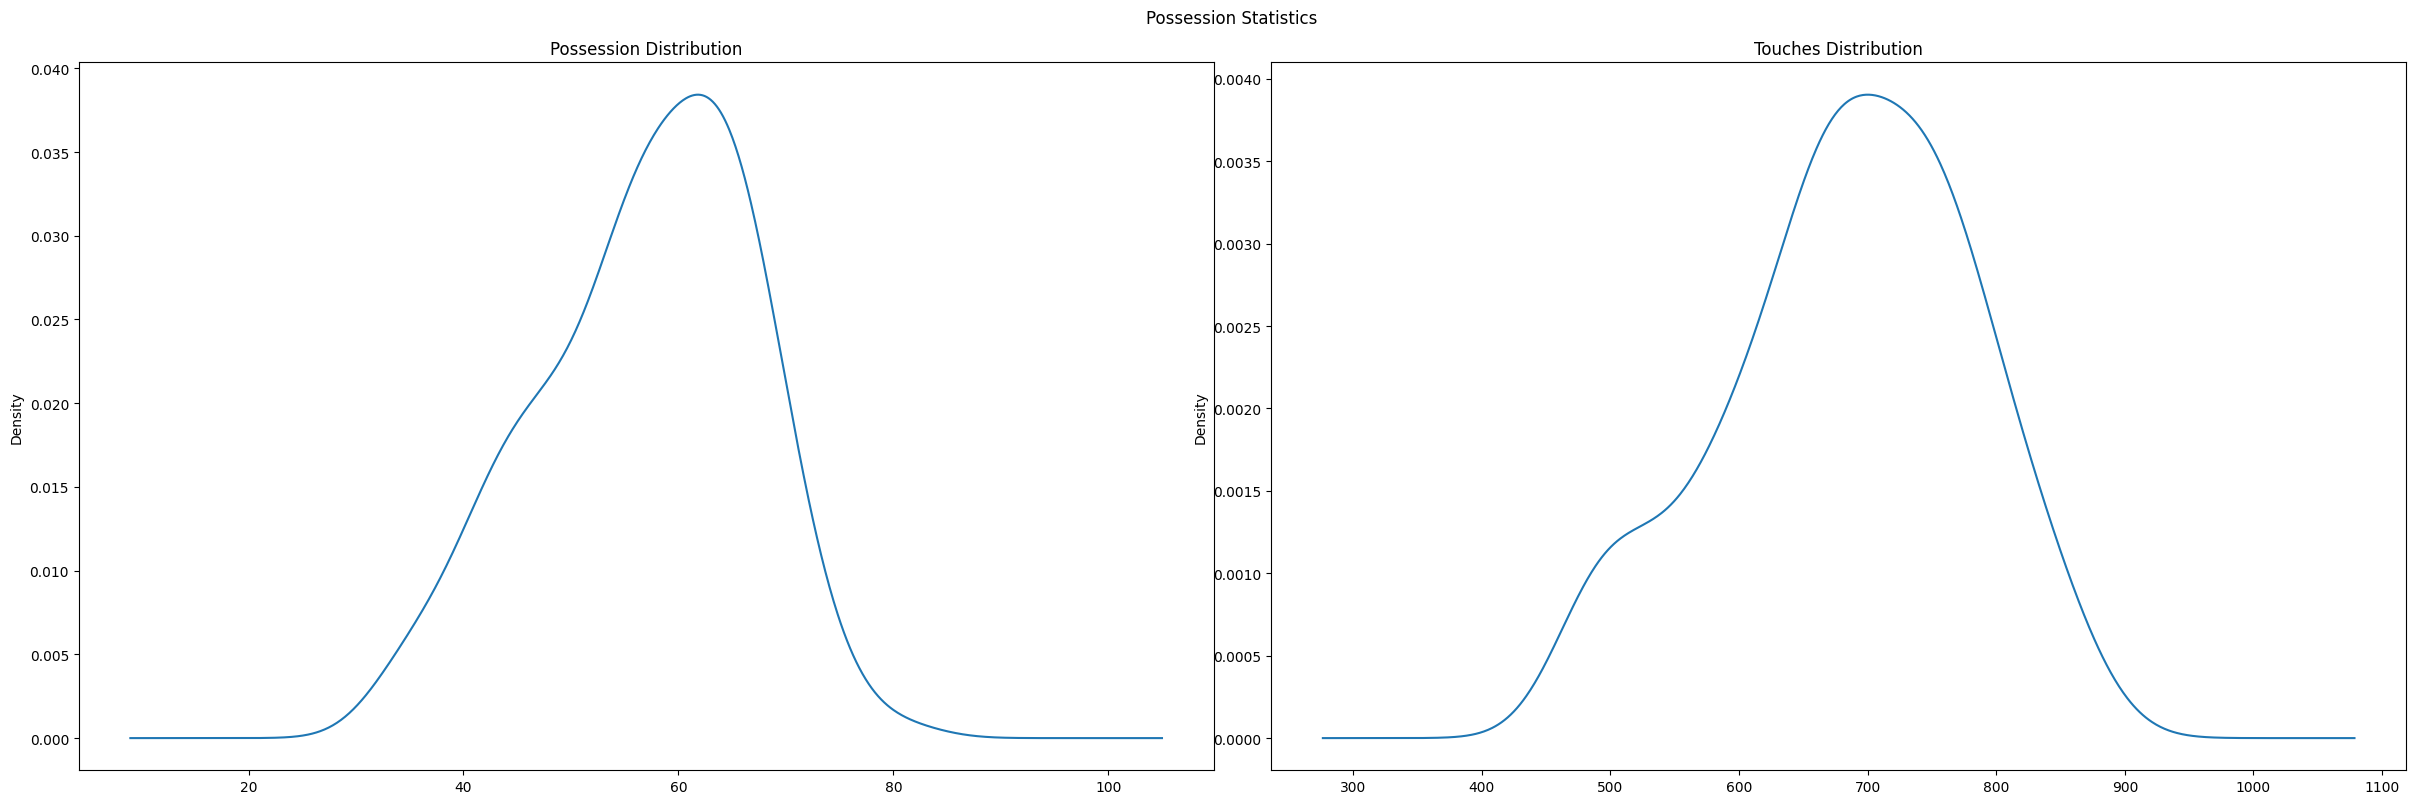

In [ ]:
Average_possession = sum(map(float,df['possession']))/TOTAL_MATCHDAYS
Average_touches = sum(map(float,df['touches']))/TOTAL_MATCHDAYS

print(f'Average Possession accumulated throughout: {Average_possession}')
print(f'Average Touches accumulated throughout : {Average_touches}')

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
fig.suptitle('Possession Statistics', y=1)
fig.tight_layout()

df['possession'].astype('float').plot.kde(ax = axes[0],title='Possession Distribution')
df['touches'].astype('float').plot.kde(ax = axes[1],title='Touches Distribution')
plt.show()


In [ ]:
import altair as alt

In [ ]:
print(f' Total Goals Scored : {round(np.sum(df["goals_for"]), 2)}')
print(f' Total Goals Conceded  : {round(np.sum(df["goals_against"]), 2)}')
print(f' Average Goals Scored Per Match : {round(np.mean(df["goals_for"]), 2)}')
print(f' Average Goals Conceded Per Match : {round(np.mean(df["goals_against"]), 2)}')

#visualisations
c1 = alt.Chart(df).mark_bar().encode(
    alt.X("goals_for:Q", bin=True),
    y='count()',
    color='goals_for',
).properties(
    title='Goals scored',
)


c2 = alt.Chart(df).mark_bar().encode(
    alt.X("goals_against:Q", bin=True),
    y='count()',
    color='goals_against'
).properties(
    title='Goals conceded',
)


c3 = alt.Chart(df).mark_bar().encode(
    x = "opponent",
    y='goals_for',
    color='goals_for'
).properties(
    title='Goals Scored vs Opponents'
)

c4 = alt.Chart(df).mark_bar().encode(
    x = "opponent",
    y='goals_against',
    color='goals_against'
).properties(
    title='Goals Conceded vs Opponents'
)


c5 = alt.Chart(df).mark_bar().encode(
    alt.X("expected_goals:Q", bin=True),
    y='count()',
    color='expected_goals'
).properties(
    title='Expected Goals(xG) accumulated',
)


c6 = alt.Chart(df).mark_bar().encode(
    alt.X("expected_goals_allowed:Q", bin=True),
    y='count()',
    color='expected_goals_allowed'
).properties(
    title='Expected Goals against(xGA)'
)

(c1 | c2)  & (c3 | c4) & (c5 | c6)

 Total Goals Scored : 278
 Total Goals Conceded  : 190
 Average Goals Scored Per Match : 1.73
 Average Goals Conceded Per Match : 1.18


alt.VConcatChart(...)

In [ ]:
print('Standard Shooting Statistics :\n')

print(f' Average Shots attempted : {round(np.mean(df["total_shots"]), 2)}')

print(f' Average Shots on Target : {round(np.mean(df["shots_on_target"]), 2)}')

print(f' Average Shots on Target Percentage : {round(np.mean(df["shots_on_target%"]), 2)}')

print(f' Average Goals Distance(in metres) : {round(np.mean(df["average_shot_distance"]), 2)}')

print(f' Average Shots from Freekick : {round(np.mean(df["freekicks_shots"]), 2)}')

print(f' Average Penalty kicks made : {round(np.mean(df["penalty_kicks"]), 2)}')

print(f' Average Penalty kicks attempted : {round(np.mean(df["penalty_kicks_attempted"]), 2)}\n')

print('Expected Shooting Statistics : \n')

print(f' Average Expected Goals accumulated : {round(np.mean(df["expected_goals"]), 2)}')

print(f' Total Goals Conceded : {round(np.sum(df["goals_against"]), 2)}')


# Some visualisations.
c1 = alt.Chart(df).mark_bar().encode(
    alt.X("total_shots:Q", bin=True),
    y='count()',
    color='shots_on_target',
).properties(
    title='Shot distribution',
)


c2 = alt.Chart(df).mark_bar().encode(
    alt.X("shots_on_target:Q", bin=True),
    y='count()',
    color='shots_on_target%'
).properties(
    title='Shots on Target dstribution',
)


c3 = alt.Chart(df).mark_bar().encode(
    alt.X("average_shot_distance:Q", bin=True),
    y='count()',
    color='total_shots'
).properties(
    title='Distance to Goal distribution',
)



c4 = alt.Chart(df).mark_bar().encode(
    alt.X("expected_goals:Q", bin=True),
    y='count()',
    color='expected_goals'
).properties(
    title='Expected goals distribution'
)



(c1 | c2)  & (c3 | c4)

Standard Shooting Statistics :

 Average Shots attempted : 13.0
 Average Shots on Target : 4.34
 Average Shots on Target Percentage : 34.07
 Average Goals Distance(in metres) : 17.23
 Average Shots from Freekick : 0.48
 Average Penalty kicks made : 0.1
 Average Penalty kicks attempted : 0.13

Expected Shooting Statistics : 

 Average Expected Goals accumulated : 1.48
 Total Goals Conceded : 190


alt.VConcatChart(...)

In [ ]:
c1 = alt.Chart(df).mark_bar().encode(
    alt.X("clean_sheets:Q", bin=True),
    y='count()',
    color="goals_for",
).properties(
    title='Clean Sheets',
)

c2 = alt.Chart(df).mark_bar().encode(
    alt.X("penalty_kicks_saved:Q", bin=True),
    y='count()',
    color="penalty_kicks",
).properties(
    title='penalty_kicks_saved',
)


(c1 | c2 )

alt.HConcatChart(...)

# ***ML models***




In [ ]:
df.dtypes

date                            datetime64[ns]
time                                    object
round                                   object
day                                     object
venue                                   object
goals_for                                int64
goals_against                            int64
opponent                                object
expected_goals                         float64
expected_goals_allowed                 float64
possession                             float64
attendance                             float64
captain                                 object
formation                               object
referee                                 object
match report                            object
total_shots                              int64
shots_on_target                          int64
shots_on_target%                       float64
average_shot_distance                  float64
freekicks_shots                          int64
penalty_kicks

In [ ]:
del df["match report"]

In [ ]:
df["venue_code"] = df["venue"].astype("category").cat.codes

In [ ]:
df["opp_code"] = df["opponent"].astype("category").cat.codes

In [ ]:
df["hour"] = df["time"].str.replace(":.+", "", regex=True).astype("int")

In [ ]:
df["day_code"] = df["date"].dt.dayofweek

In [ ]:
df

date   time         round  day venue  goals_for  goals_against  \
0   2022-08-05  20:00   Matchweek 1  Fri  Away          2              0   
1   2022-08-13  15:00   Matchweek 2  Sat  Home          4              2   
2   2022-08-20  17:30   Matchweek 3  Sat  Away          3              0   
3   2022-08-27  17:30   Matchweek 4  Sat  Home          2              1   
4   2022-08-31  19:30   Matchweek 5  Wed  Home          2              1   
..         ...    ...           ...  ...   ...        ...            ...   
222 2018-04-15  13:30  Matchweek 34  Sun  Away          1              2   
223 2018-04-22  13:30  Matchweek 35  Sun  Home          4              1   
225 2018-05-06  16:30  Matchweek 37  Sun  Home          5              0   
226 2018-05-09  19:45  Matchweek 31  Wed  Away          1              3   
227 2018-05-13  15:00  Matchweek 38  Sun  Away          1              0   

           opponent  expected_goals  expected_goals_allowed  ...  crdy  crdr  \
0    Crystal Palace             1.0                     1.2  ...     2     0   
1    Leicester City             2.7                     0.5  ...     1     0   
2       Bournemouth             1.3                     0.3  ...     1     0   
3            Fulham             2.6                     0.8  ...     2     0   
4       Aston Villa             2.4                     0.4  ...     2     0   
..              ...             ...                     ...  ...   ...   ...   
222   Newcastle Utd             1.2                     0.8  ...     0     0   
223        West Ham             1.8                     0.8  ...     3     0   
225         Burnley             2.6                     0.3  ...     0     0   
226  Leicester City             1.4                     2.2  ...     2     1   
227    Huddersfield             2.0                     1.7  ...     0     0   

    fls offsides own_goals  output  venue_code  opp_code  hour  day_code  
0    11        2         0       1           0         7    20         4  
1    15        2         1       1           1        12    15         5  
2    10        3         0       1           0         1    17         5  
3     6        1         0       1           1         9    17         5  
4    10        1         0       1           1         0    19         2  
..   ..      ...       ...     ...         ...       ...   ...       ...  
222   9        2         0       0           0        16    13         6  
223  11        1         0       1           1        24    13         6  
225   6        0         0       1           1         4    16         6  
226  12        1         0       0           0        12    19         2  
227   7        2         0       1           0        10    15         6  

[161 rows x 45 columns]

In [ ]:
df.dtypes

date                            datetime64[ns]
time                                    object
round                                   object
day                                     object
venue                                   object
goals_for                                int64
goals_against                            int64
opponent                                object
expected_goals                         float64
expected_goals_allowed                 float64
possession                             float64
attendance                             float64
captain                                 object
formation                               object
referee                                 object
total_shots                              int64
shots_on_target                          int64
shots_on_target%                       float64
average_shot_distance                  float64
freekicks_shots                          int64
penalty_kicks                            int64
penalty_kicks

# ***Splitting the data set***

In [ ]:
X = df.drop(columns=['output','time','date','round','day','venue','opponent','captain','referee','formation'])
X.head()

goals_for  goals_against  expected_goals  expected_goals_allowed  \
0          2              0             1.0                     1.2   
1          4              2             2.7                     0.5   
2          3              0             1.3                     0.3   
3          2              1             2.6                     0.8   
4          2              1             2.4                     0.4   

   possession  attendance  total_shots  shots_on_target  shots_on_target%  \
0        44.0     25286.0           10                2              20.0   
1        50.0     60033.0           19                7              36.8   
2        57.0     10423.0           14                6              42.9   
3        71.0     60164.0           22                8              36.4   
4        59.0     60012.0           22                8              36.4   

   average_shot_distance  ...  final_third_carries  crdy  crdr  fls  offsides  \
0                   14.6  ...                    8     2     0   11         2   
1                   13.0  ...                   19     1     0   15         2   
2                   14.8  ...                   19     1     0   10         3   
3                   15.5  ...                   18     2     0    6         1   
4                   16.3  ...                   19     2     0   10         1   

   own_goals  venue_code  opp_code  hour  day_code  
0          0           0         7    20         4  
1          1           1        12    15         5  
2          0           0         1    17         5  
3          0           1         9    17         5  
4          0           1         0    19         2  

[5 rows x 35 columns]

In [ ]:
Y = df.output
Y

0      1
1      1
2      1
3      1
4      1
      ..
222    0
223    1
225    1
226    0
227    1
Name: output, Length: 161, dtype: int64

# ***Standardization***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.2142445 , -1.09274836, -0.70493525, ..., -0.73990591,
         1.42439871, -0.26275722],
       [ 1.78212472,  0.75917254,  1.81058988, ..., -0.06840167,
        -0.45842717,  0.2595133 ],
       [ 0.99818461, -1.09274836, -0.26101905, ..., -1.545711  ,
         0.29470318,  0.2595133 ],
       ...,
       [ 2.56606483, -1.09274836,  1.66261781, ..., -1.14280846,
        -0.081862  ,  0.78178382],
       [-0.56969561,  1.68513299, -0.11304698, ..., -0.06840167,
         1.04783354, -1.30729826],
       [-0.56969561, -1.09274836,  0.77478541, ..., -0.33700337,
        -0.45842717,  0.78178382]])

# ***Decision Tree Model***

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Split dataset into training set and test set with standrization
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.50, random_state=1) # 50% training and 50% test

In [ ]:
# Split dataset into training set and test set without standrization
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, Y, test_size=0.5, random_state=1) # 50% training and 50% test

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8518518518518519


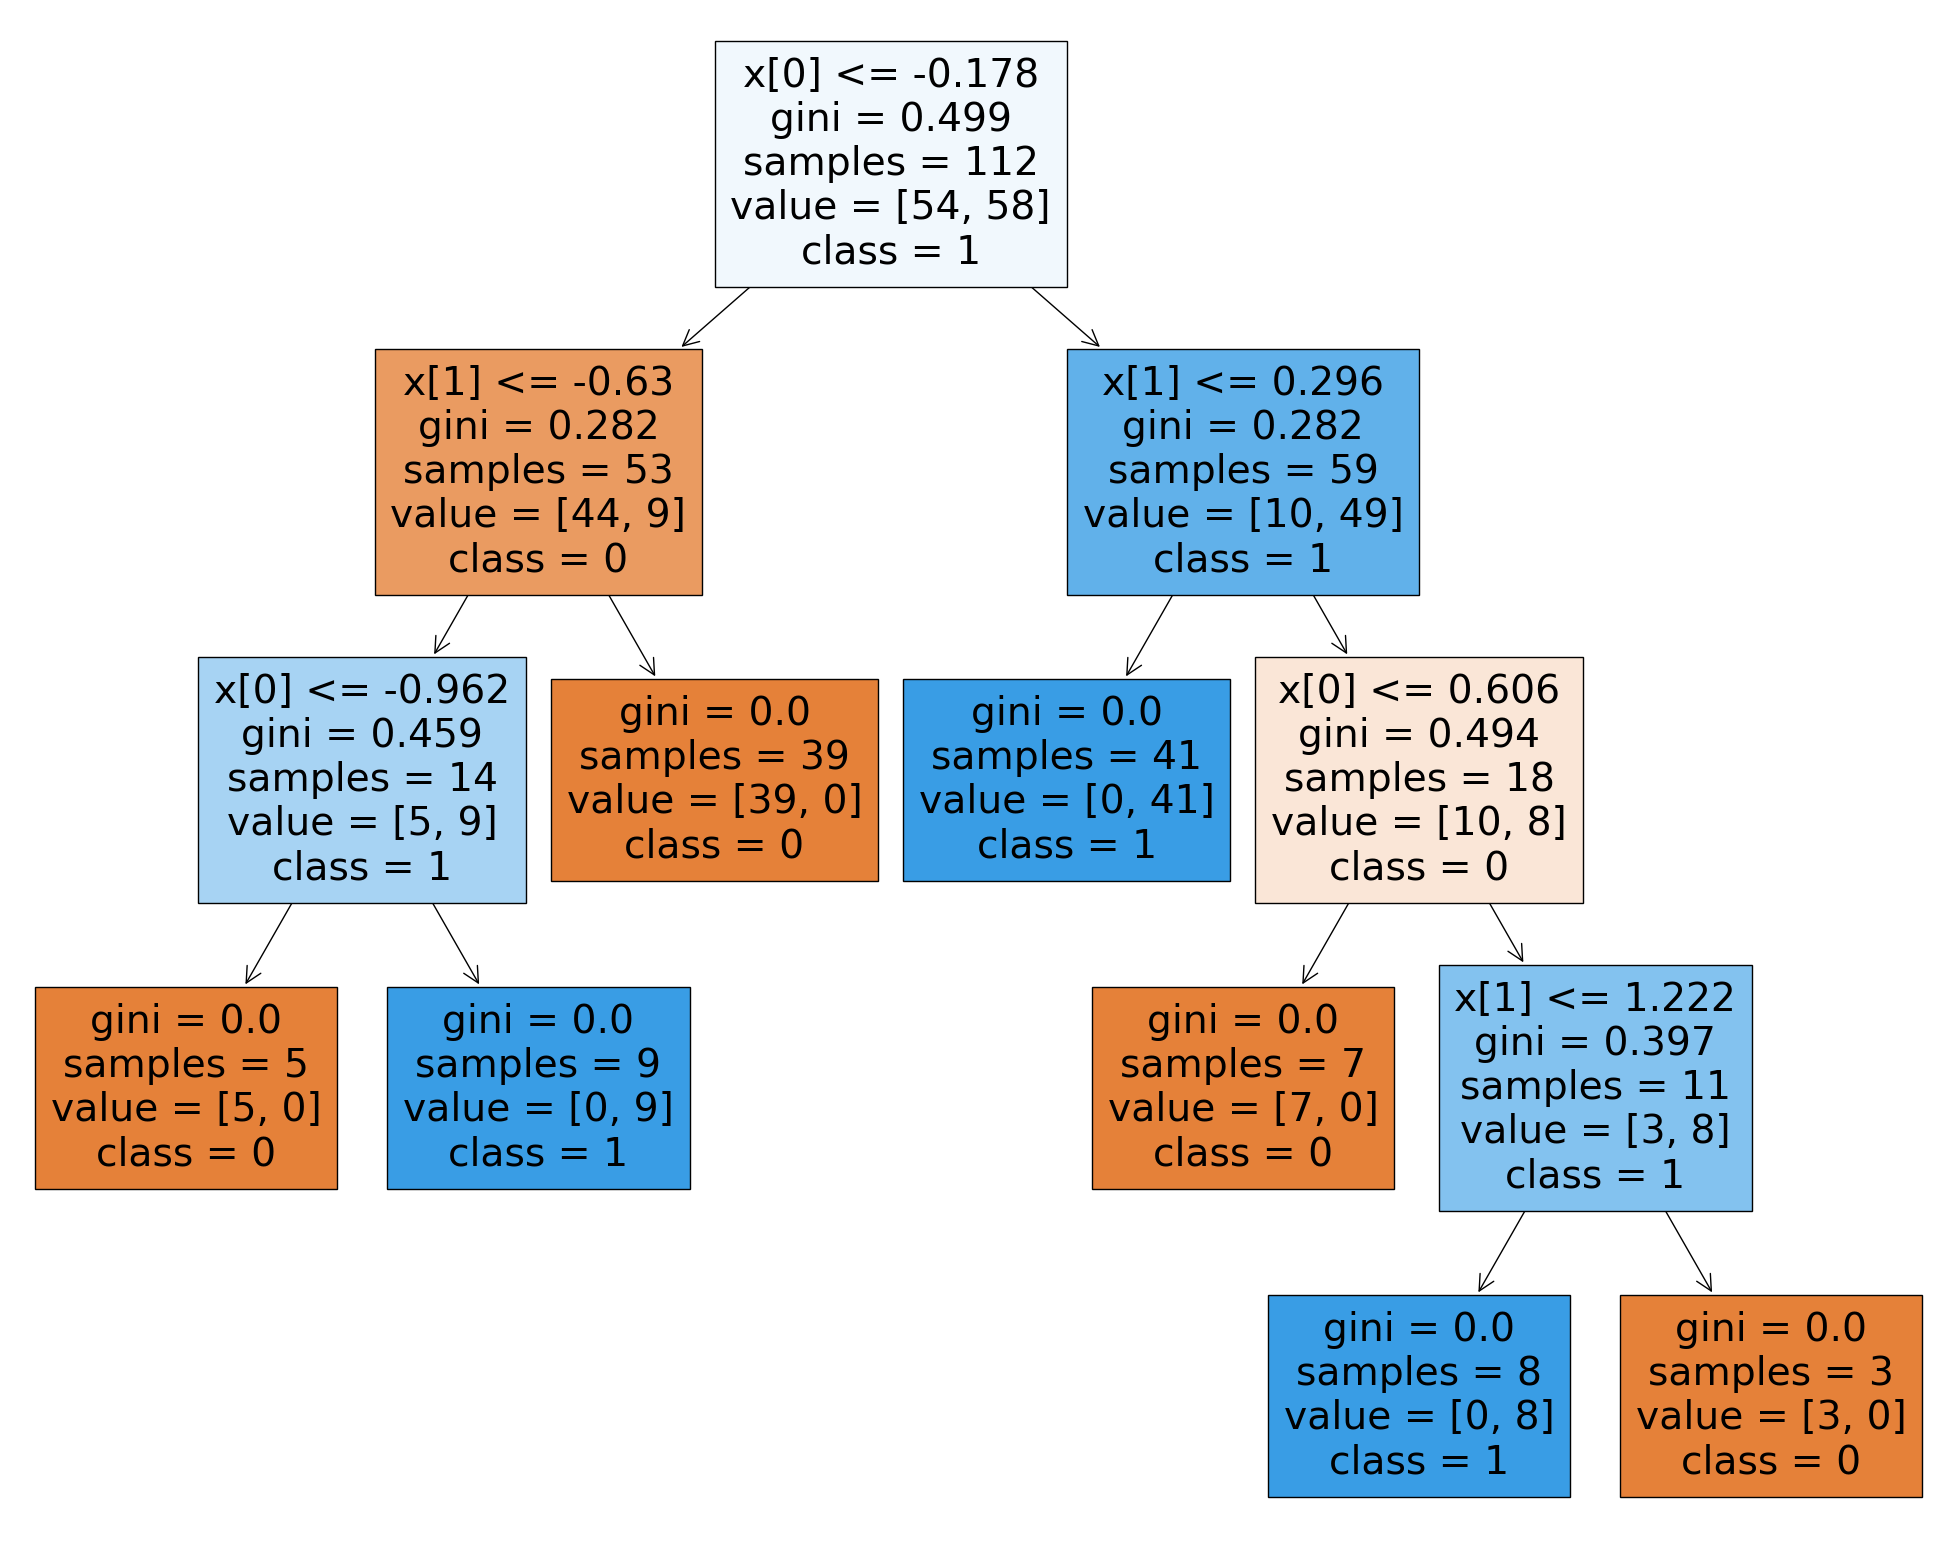

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   class_names=['0','1'],
                   filled=True)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8024691358024691


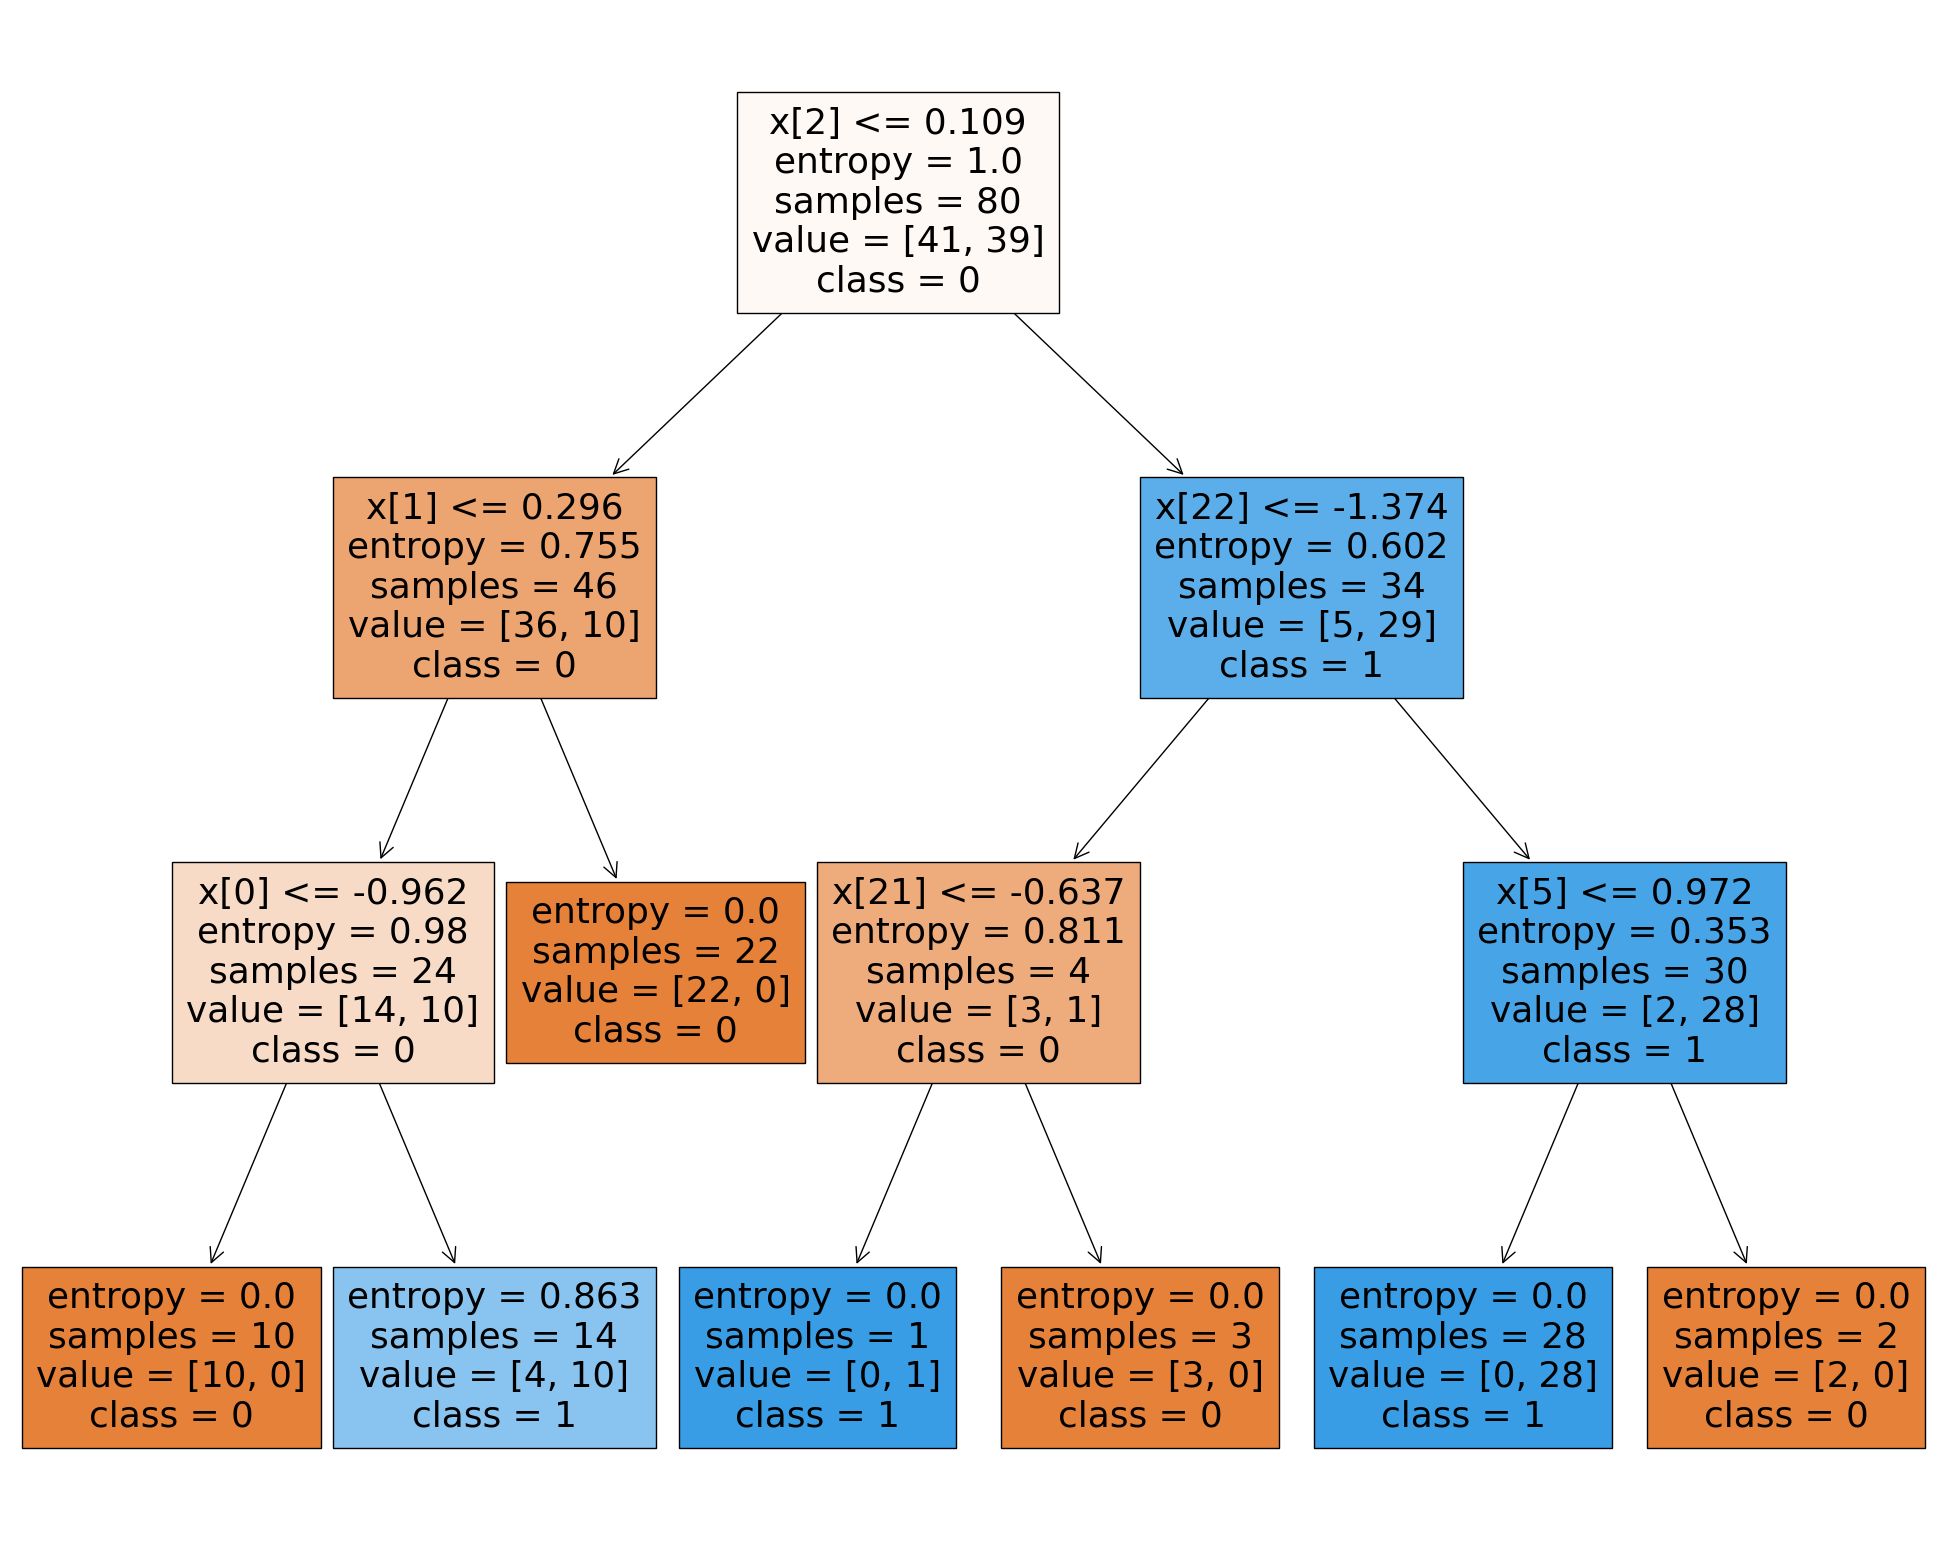

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, class_names=['0','1'],
                   filled=True)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


0.8024691358024691


array([[24, 12],
       [ 4, 41]])

Text(0.5, 427.9555555555555, 'Predicted label')

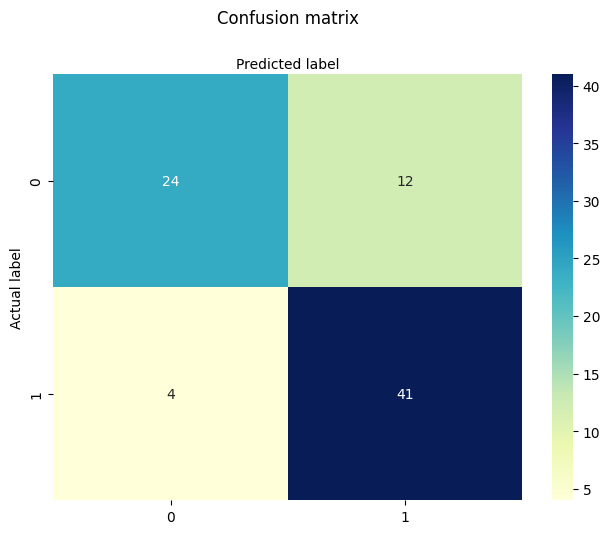

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_score:",metrics.f1_score(y_test, y_pred))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.8024691358024691
Precision: 0.7735849056603774
Recall: 0.9111111111111111
F1_score: 0.8367346938775511
AUC_ROC: 0.788888888888889


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[24 12]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        36
           1       0.77      0.91      0.84        45

    accuracy                           0.80        81
   macro avg       0.82      0.79      0.79        81
weighted avg       0.81      0.80      0.80        81



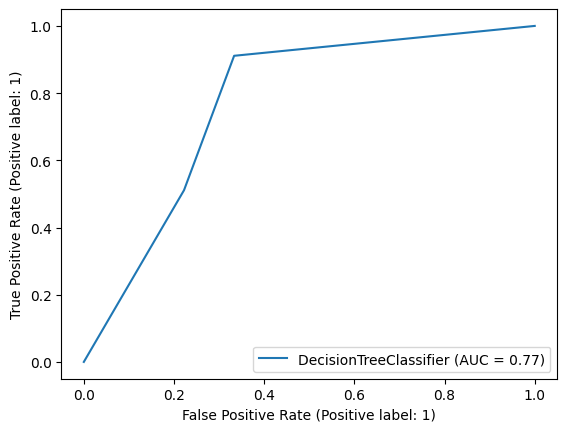

In [ ]:
from sklearn.metrics import RocCurveDisplay
sgd_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.7728395061728395

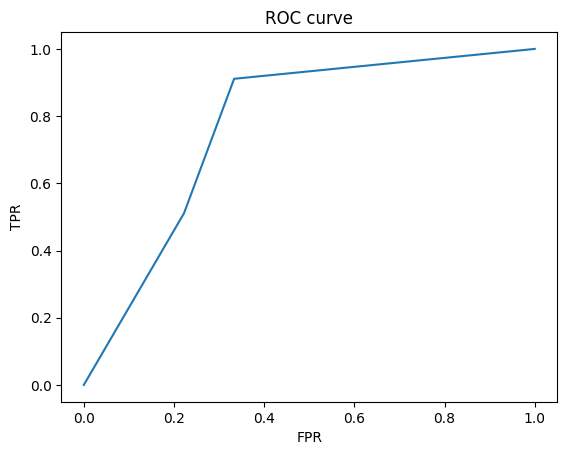

In [ ]:
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# ***Decision Tree Hyperparameter Tuning***

In [ ]:
# finding the best parameters for the decision tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {'criterion' :['gini', 'entropy'],'max_depth': [3,4,5, 6, 10, 12]}

tree_clas = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True, scoring = 'f1')
grid_search.fit(X_train, y_train)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)


In [ ]:
Dt_final = grid_search.best_estimator_
Dt_final

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score
tree1 = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=3,
                                     max_features='auto',
                                     random_state=42)

tree1.fit(X_train,y_train)

print("Training Score In Decision Tree Classification:",tree1.score(X_train, y_train))
print("Validation Score In Decision Tree: Classification",tree1.score(X_test, y_test))
y_pred_g = tree1.predict(X_test)

print("DT Accuracy=",accuracy_score(y_test, y_pred_g))
print("DT F1 score=",f1_score(y_test, y_pred_g))


Training Score In Decision Tree Classification: 0.85
Validation Score In Decision Tree: Classification 0.654320987654321
DT Accuracy= 0.654320987654321
DT F1 score= 0.6888888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


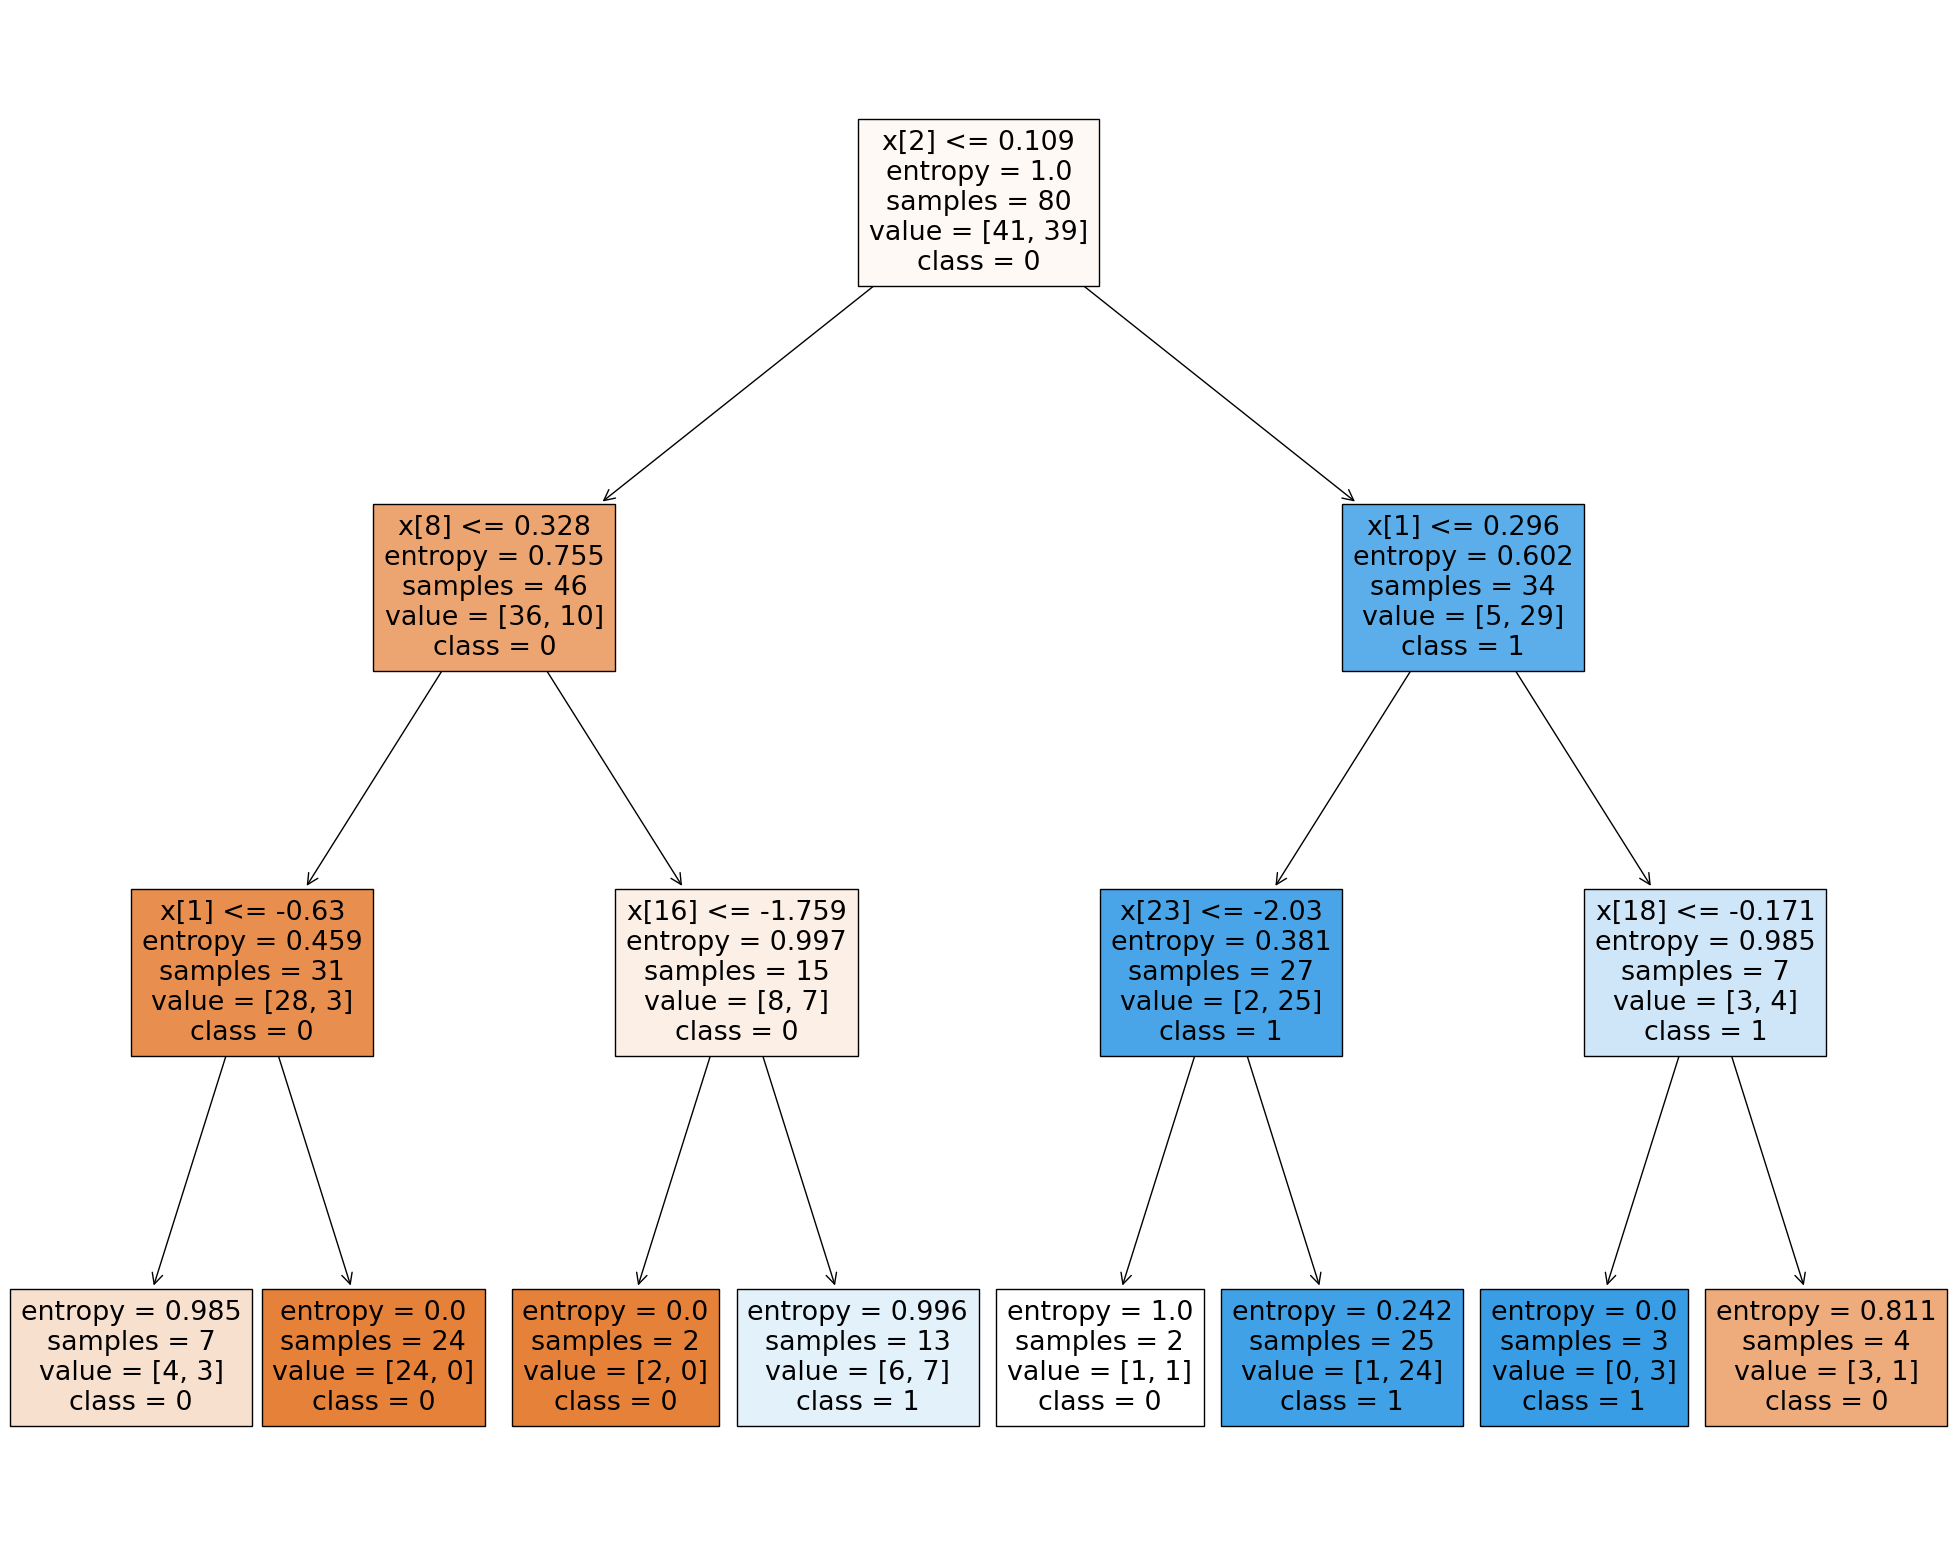

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree1,class_names=['0','1'],
                   filled=True)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_g)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix_g = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix_g


0.654320987654321


array([[24, 12],
       [ 4, 41]])

Text(0.5, 427.9555555555555, 'Predicted label')

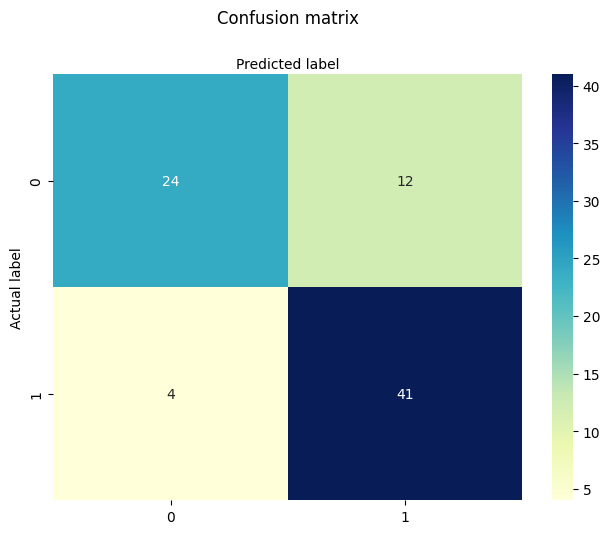

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_g), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_g))
print("Precision:",metrics.precision_score(y_test, y_pred_g))
print("Recall:",metrics.recall_score(y_test, y_pred_g))
print("F1_score:",metrics.f1_score(y_test, y_pred_g))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_g))

Accuracy: 0.654320987654321
Precision: 0.6888888888888889
Recall: 0.6888888888888889
F1_score: 0.6888888888888889
AUC_ROC: 0.65


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred_g))
print(classification_report(y_test,y_pred_g))

[[22 14]
 [14 31]]
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        36
           1       0.69      0.69      0.69        45

    accuracy                           0.65        81
   macro avg       0.65      0.65      0.65        81
weighted avg       0.65      0.65      0.65        81



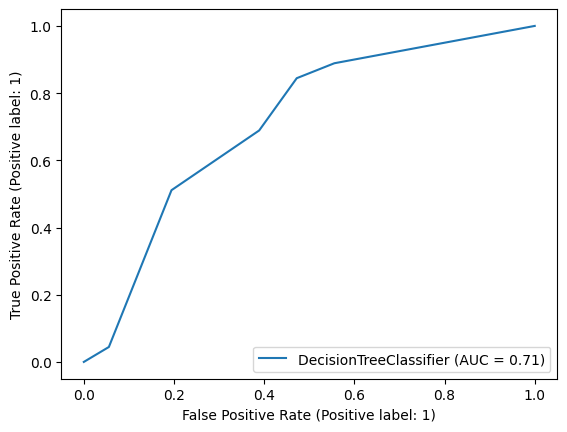

In [ ]:
from sklearn.metrics import RocCurveDisplay
sgd_disp = RocCurveDisplay.from_estimator(tree1, X_test, y_test)

# ***K-Nearest Neighbors Model KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(X_test)

In [ ]:
#print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_knn)))

In [ ]:
# print the scores on training and test set
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8250
Test set score: 0.8395


These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn)

print("Accuracy score (KNN): ", knn_score)


Accuracy score (KNN):  0.8395061728395061


In [ ]:
knn.score(X_test, y_test)

0.8395061728395061

In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[29,  7],
       [ 6, 39]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_knn))

Accuracy: 0.8395061728395061
Precision: 0.8478260869565217
Recall: 0.8666666666666667
F1_score: 0.8571428571428571
AUC_ROC: 0.8361111111111111


In [ ]:
print(classification_report(y_test, y_pred_knn))  # knn classification report

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        36
           1       0.85      0.87      0.86        45

    accuracy                           0.84        81
   macro avg       0.84      0.84      0.84        81
weighted avg       0.84      0.84      0.84        81



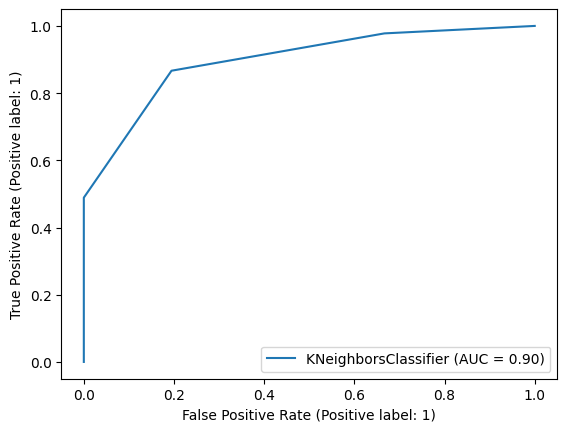

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


Text(0, 0.5, 'Mean Error')

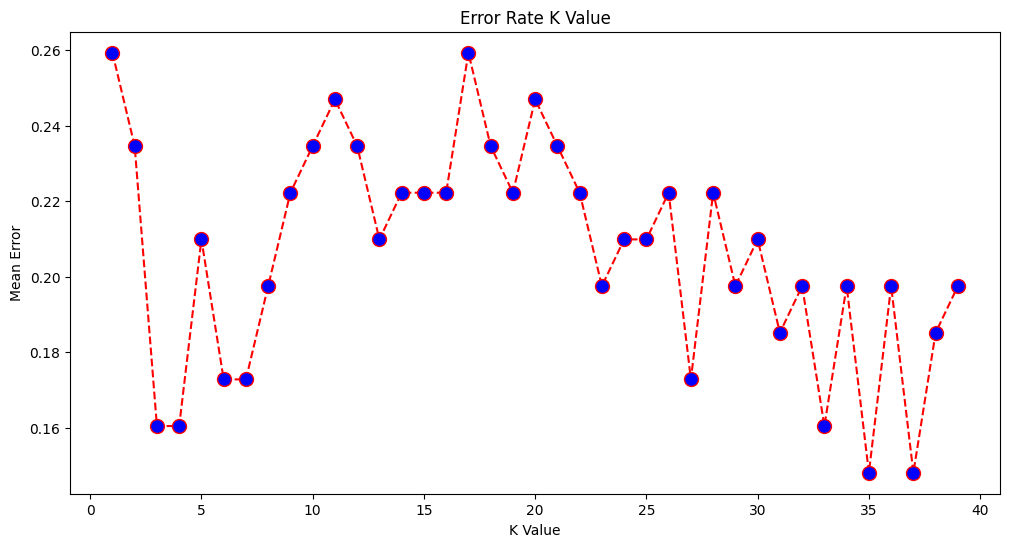

In [ ]:
error = []
import numpy as np
import matplotlib.pyplot as plt
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 7)
knn2.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn2 = knn2.predict(X_test)

In [ ]:
knn2.predict(X_test)[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
# print the scores on training and test set
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn2.score(X_test, y_test)))

Training set score: 0.8500
Test set score: 0.8272


These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
knn2.score(X_test, y_test)


0.8271604938271605

In [ ]:
knn_score = accuracy_score(y_test, y_pred_knn2)

print("Accuracy score (KNN): ", knn_score)


Accuracy score (KNN):  0.8271604938271605


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn2))
print("Precision:",metrics.precision_score(y_test, y_pred_knn2))
print("Recall:",metrics.recall_score(y_test, y_pred_knn2))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn2))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_knn2))

Accuracy: 0.8271604938271605
Precision: 0.8297872340425532
Recall: 0.8666666666666667
F1_score: 0.8478260869565217
AUC_ROC: 0.8222222222222223


In [ ]:
confusion_matrix(y_test, y_pred_knn2)

array([[28,  8],
       [ 6, 39]])

In [ ]:
print(classification_report(y_test, y_pred_knn2))  # knn classification report

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.83      0.87      0.85        45

    accuracy                           0.83        81
   macro avg       0.83      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



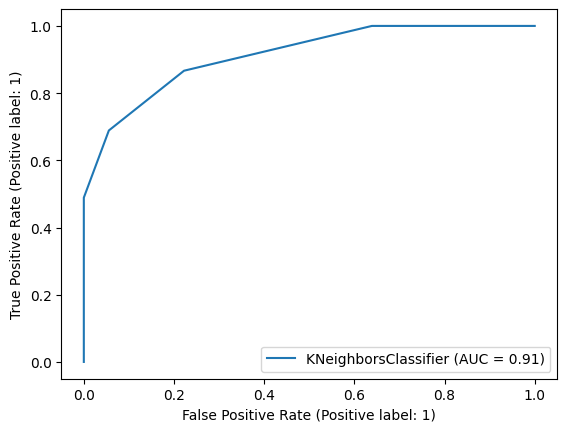

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn2, X_test, y_test)


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=2)
#train model with cv of 5
cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.60606061 0.5625     0.5625     0.5625     0.65625   ]
cv_scores mean:0.5899621212121212


# ***K-Nearest Neighbors Model KNN Hyperparameter Tuning***




In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn3, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_


0.6022727272727273

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors = 13)
knn3.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=13)

In [ ]:
y_pred_knn3 = knn3.predict(X_test)

In [ ]:
# print the scores on training and test set
#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(knn3.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn3.score(X_test, y_test)))

Training set score: 0.8500
Test set score: 0.7901


These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
knn3.score(X_test, y_test)


0.7901234567901234

In [ ]:
knn_score3 = accuracy_score(y_test, y_pred_knn3)

print("Accuracy score (KNN): ", knn_score3)


Accuracy score (KNN):  0.7901234567901234


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn3))
print("Precision:",metrics.precision_score(y_test, y_pred_knn3))
print("Recall:",metrics.recall_score(y_test, y_pred_knn3))
print("F1_score:",metrics.f1_score(y_test, y_pred_knn3))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_knn3))

Accuracy: 0.7901234567901234
Precision: 0.78
Recall: 0.8666666666666667
F1_score: 0.8210526315789474
AUC_ROC: 0.7805555555555556


In [ ]:
confusion_matrix(y_test, y_pred_knn3)

array([[25, 11],
       [ 6, 39]])

In [ ]:
print(classification_report(y_test, y_pred_knn3))  # knn classification report

              precision    recall  f1-score   support

           0       0.81      0.69      0.75        36
           1       0.78      0.87      0.82        45

    accuracy                           0.79        81
   macro avg       0.79      0.78      0.78        81
weighted avg       0.79      0.79      0.79        81



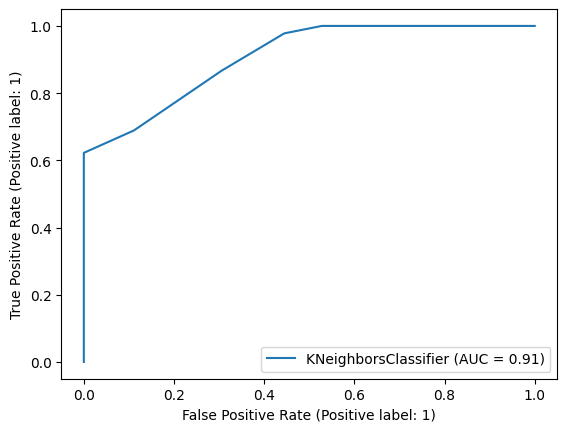

In [ ]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn3, X_test, y_test)

# ***Naive Bayes NB Model***




In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred_NB1 = nb.predict(X_test)

In [ ]:
print("Naive Bayes score: ",nb.score(X_test, y_test))

Naive Bayes score:  0.8148148148148148


In [ ]:
nb_score1 = accuracy_score(y_test, y_pred_NB1)

print("Accuracy score (KNN): ", nb_score1)


Accuracy score (KNN):  0.8148148148148148


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_NB1))
print("Precision:",metrics.precision_score(y_test, y_pred_NB1))
print("Recall:",metrics.recall_score(y_test, y_pred_NB1))
print("F1_score:",metrics.f1_score(y_test, y_pred_NB1))
print("AUC_ROC:",metrics.roc_auc_score(y_test, y_pred_NB1))

Accuracy: 0.8148148148148148
Precision: 0.8947368421052632
Recall: 0.7555555555555555
F1_score: 0.8192771084337349
AUC_ROC: 0.8222222222222222


In [ ]:
confusion_matrix(y_test, y_pred_NB1)

array([[32,  4],
       [11, 34]])

In [ ]:
print(classification_report(y_test, y_pred_NB1))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        36
           1       0.89      0.76      0.82        45

    accuracy                           0.81        81
   macro avg       0.82      0.82      0.81        81
weighted avg       0.83      0.81      0.82        81



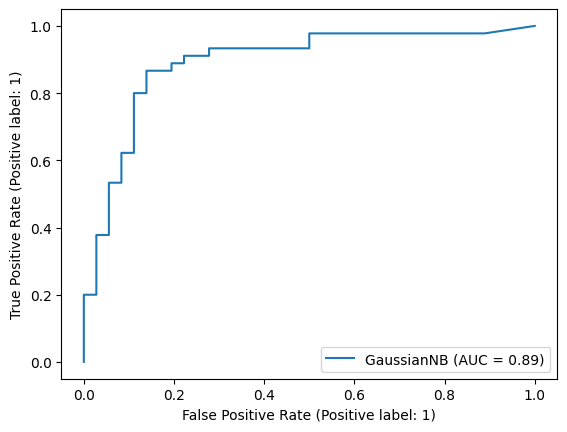

In [ ]:
knn_disp = RocCurveDisplay.from_estimator(nb, X_test, y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_trainN, y_trainN)

y_pred_NB = mnb.predict(X_testN)

print('Accuracy: {:.2f}'.format(accuracy_score(y_testN, y_pred_NB)))


Accuracy: 0.60


In [ ]:
print("Naive Bayes score2: ",mnb.score(X_testN, y_testN))


Naive Bayes score2:  0.6049382716049383


In [ ]:
y_pred_NB2 = mnb.predict(X_testN)

In [ ]:
nb_score2 = accuracy_score(y_testN, y_pred_NB2)

print("Accuracy score (KNN)MNB: ", nb_score2)


Accuracy score (KNN)MNB:  0.6049382716049383


In [ ]:
confusion_matrix(y_testN, y_pred_NB2)

array([[19, 17],
       [15, 30]])

In [ ]:
print(classification_report(y_testN, y_pred_NB2))

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        36
           1       0.64      0.67      0.65        45

    accuracy                           0.60        81
   macro avg       0.60      0.60      0.60        81
weighted avg       0.60      0.60      0.60        81



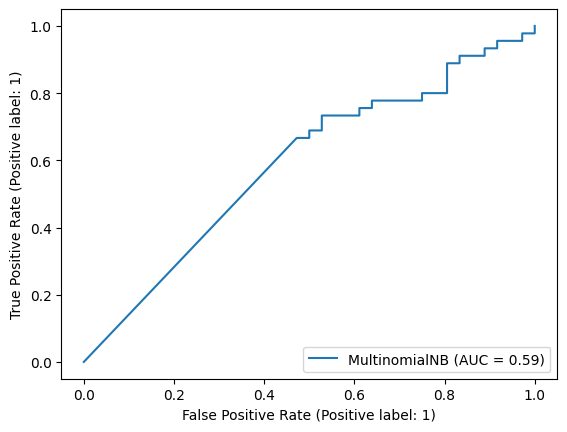

In [ ]:
knn_disp2 = RocCurveDisplay.from_estimator(mnb, X_testN, y_testN)

# ***Naive Bayes NB Hyperparameter Tuning***




In [ ]:
from sklearn.model_selection import GridSearchCV
np.logspace(0,-9, num=10)
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


gs_NB = GridSearchCV(estimator=nb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.0657933224657568}

In [ ]:
gs_NB.best_score_

0.8806372549019609

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

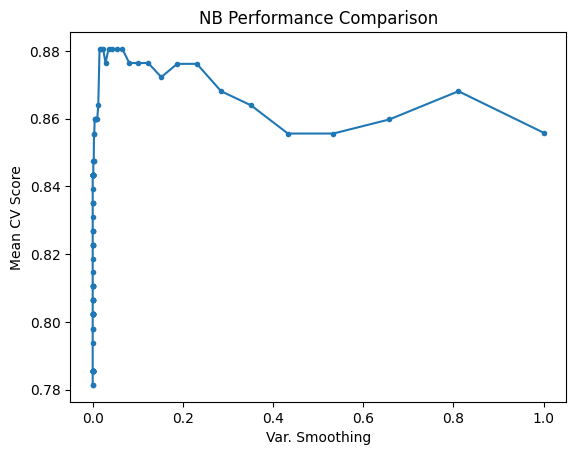

In [ ]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9382716049382716


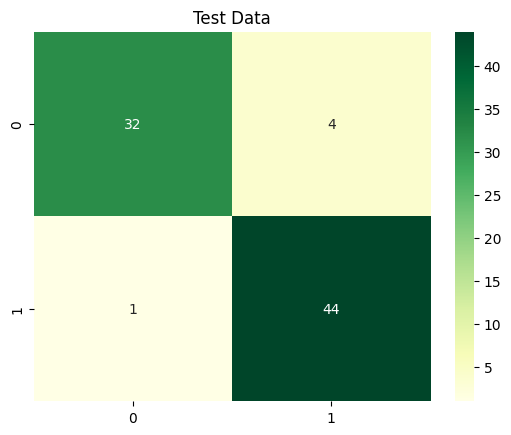

In [ ]:
sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',cmap="YlGn").set_title('Test Data');

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.92      0.98      0.95        45

    accuracy                           0.94        81
   macro avg       0.94      0.93      0.94        81
weighted avg       0.94      0.94      0.94        81



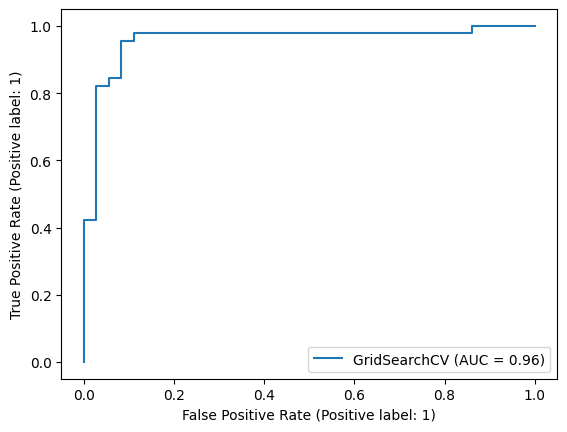

In [ ]:
gs_NB_disp2 = RocCurveDisplay.from_estimator(gs_NB, X_test, y_test)

# ***ANN MLP Model***




In [ ]:
from sklearn.neural_network import MLPClassifier

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train_mlp = mlp.predict(X_train)
predict_test_mlp  = mlp.predict(X_test)


In [ ]:
print("MLP SCORE: ",mlp.score(X_test, y_test))


MLP SCORE:  0.8518518518518519


In [ ]:
mlp_score = accuracy_score(y_test, predict_test_mlp)

print("Accuracy score MLP: ", mlp_score)


Accuracy score MLP:  0.8518518518518519


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predict_test_mlp))
print("Precision:",metrics.precision_score(y_test, predict_test_mlp))
print("Recall:",metrics.recall_score(y_test, predict_test_mlp))
print("F1_score:",metrics.f1_score(y_test, predict_test_mlp))
print("AUC_ROC:",metrics.roc_auc_score(y_test, predict_test_mlp))

Accuracy: 0.8518518518518519
Precision: 0.851063829787234
Recall: 0.8888888888888888
F1_score: 0.8695652173913044
AUC_ROC: 0.8472222222222223


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train, predict_train_mlp))
print(classification_report(y_train, predict_train_mlp))

[[41  0]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
print(confusion_matrix(y_test,predict_test_mlp))
print(classification_report(y_test,predict_test_mlp))


[[29  7]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        36
           1       0.85      0.89      0.87        45

    accuracy                           0.85        81
   macro avg       0.85      0.85      0.85        81
weighted avg       0.85      0.85      0.85        81



# ***ANN MLP Model Hyperparameter tuning***




In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(13,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling'],
          'max_iter': [500]
         }

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Train Accuracy : 1.000
Test Accuracy : 0.914
Best Accuracy Through Grid Search : 0.887
Best Parameters :  {'activation': 'logistic', 'hidden_layer_sizes': (50, 100), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}


In [ ]:
mlp2 = MLPClassifier(activation= 'relu', hidden_layer_sizes= (13,), learning_rate='constant', solver='lbfgs', max_iter=500)
mlp2.fit(X_train,y_train)


MLPClassifier(hidden_layer_sizes=(13,), max_iter=500, solver='lbfgs')

In [ ]:
predictions = mlp2.predict(X_test)

In [ ]:
mlp2_score = accuracy_score(y_test, predictions)

print("Accuracy score MLP_2: ", mlp2_score)

Accuracy score MLP_2:  0.9135802469135802


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))
print("F1_score:",metrics.f1_score(y_test, predictions))
print("AUC_ROC:",metrics.roc_auc_score(y_test, predictions))

Accuracy: 0.9135802469135802
Precision: 0.9523809523809523
Recall: 0.8888888888888888
F1_score: 0.9195402298850575
AUC_ROC: 0.9166666666666666


In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[34  2]
 [ 5 40]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.95      0.89      0.92        45

    accuracy                           0.91        81
   macro avg       0.91      0.92      0.91        81
weighted avg       0.92      0.91      0.91        81



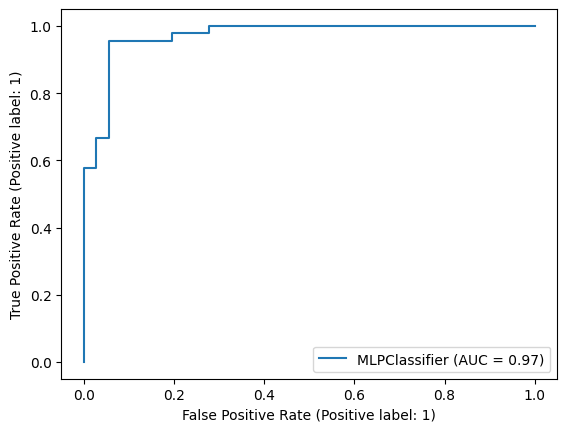

In [ ]:
mlp2_disp = RocCurveDisplay.from_estimator(mlp2, X_test, y_test)

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))


Accuracy: 0.8271604938271605


In [ ]:
rf.score(X_test, y_test)

0.8271604938271605

In [ ]:
confusion_matrix(y_test, preds)

array([[28,  8],
       [ 6, 39]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Precision:",metrics.precision_score(y_test, preds))
print("Recall:",metrics.recall_score(y_test, preds))
print("F1_score:",metrics.f1_score(y_test, preds))
print("AUC_ROC:",metrics.roc_auc_score(y_test, preds))

Accuracy: 0.8271604938271605
Precision: 0.8297872340425532
Recall: 0.8666666666666667
F1_score: 0.8478260869565217
AUC_ROC: 0.8222222222222223


In [ ]:
print(classification_report(y_test, preds))  # knn classification report

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.83      0.87      0.85        45

    accuracy                           0.83        81
   macro avg       0.83      0.82      0.82        81
weighted avg       0.83      0.83      0.83        81



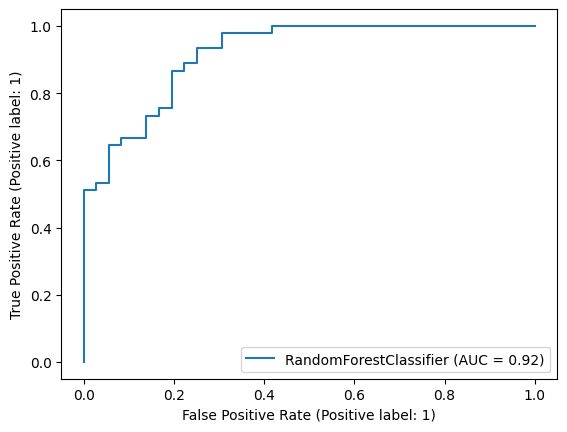

In [ ]:
from sklearn.metrics import RocCurveDisplay
rf_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

In [ ]:
y_pred_proba222 = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba222)

In [ ]:
roc_auc_score(y_test,y_pred_proba222)

0.9179012345679012